# Hotel Analysis and EDA

# Loading Libraries

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import numpy as np
import pandas as pd

In [220]:
pd.set_option('display.max_columns', 100)

In [221]:
previous_dir = None # Failsafe if directory does not start in notebook directory 
while not os.path.exists('README.md'):
    current_dir = os.getcwd()

    if current_dir == previous_dir:
        print('Warning: Project root not found. Project currently at', current_dir)
        break

    previous_dir = current_dir
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [222]:
fav_cols = ['#bf616a', '#d08770', '#ebcb8b', '#a3be8c', '#b48ead']

# Loading the Data

In [223]:
excel_file = os.path.abspath(os.path.join(os.getcwd(),'data', 'raw', 'hotel_data.xlsx'))

if os.path.exists(excel_file):
    excel = pd.ExcelFile(excel_file)
    excel_sheets = {sheet_name : excel.parse(sheet_name) for sheet_name in excel.sheet_names}
else:
    print('File does not exist')

In [224]:
excel_sheets.keys()

dict_keys(['2018', '2019', '2020', 'meal_cost', 'market_segment'])

In [225]:
pd.DataFrame(excel_sheets['2018'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21991,City Hotel,1,24,2018,December,53,27,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,NaN,0,Transient,58.00,0,0,No-Show,2018-12-27
21992,City Hotel,1,1,2018,December,53,27,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,147.67,0,0,No-Show,2018-12-27
21993,City Hotel,1,66,2018,December,53,28,0,5,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,170.90,0,1,No-Show,2018-12-29
21994,City Hotel,1,54,2018,December,53,30,1,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Contract,118.20,0,1,No-Show,2018-12-30


In [226]:
hotel_df = pd.concat([excel_sheets['2018'], excel_sheets['2019'], excel_sheets['2020']])
meal_df = pd.DataFrame(excel_sheets['meal_cost'])
market_df = pd.DataFrame(excel_sheets['market_segment'])

In [227]:
meal_df.head()

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [228]:
market_df.head()

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation


In [229]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [230]:
hotel_df.shape

(141947, 32)

In [231]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141947 entries, 0 to 40686
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  float64      

In [232]:
for col in hotel_df.columns:
    print(f'{col}, Dtype: {hotel_df[col].dtype}')

hotel, Dtype: object
is_canceled, Dtype: int64
lead_time, Dtype: int64
arrival_date_year, Dtype: int64
arrival_date_month, Dtype: object
arrival_date_week_number, Dtype: int64
arrival_date_day_of_month, Dtype: int64
stays_in_weekend_nights, Dtype: int64
stays_in_week_nights, Dtype: int64
adults, Dtype: int64
children, Dtype: float64
babies, Dtype: int64
meal, Dtype: object
country, Dtype: object
market_segment, Dtype: object
distribution_channel, Dtype: object
is_repeated_guest, Dtype: int64
previous_cancellations, Dtype: int64
previous_bookings_not_canceled, Dtype: int64
reserved_room_type, Dtype: object
assigned_room_type, Dtype: object
booking_changes, Dtype: int64
deposit_type, Dtype: object
agent, Dtype: float64
company, Dtype: float64
days_in_waiting_list, Dtype: int64
customer_type, Dtype: object
adr, Dtype: float64
required_car_parking_spaces, Dtype: int64
total_of_special_requests, Dtype: int64
reservation_status, Dtype: object
reservation_status_date, Dtype: datetime64[ns]


In [233]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              625
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              19555
company         

In [234]:
hotel_df.fillna(value = 0, inplace = True)

# EDA

## Numerical and Categorical Summaries

In [235]:
hotel_df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947
mean,0.372245,102.821102,2019.131676,29.061058,15.748970,0.927557,2.495509,1.852551,0.097396,0.008285,0.031364,0.125413,0.120327,0.213939,73.881540,10.488372,2.305565,99.416916,0.062129,0.549677,2019-07-31 01:44:15.991320576
min,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,17.000000,2019.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,65.750000,0.000000,0.000000,2019-02-25 00:00:00
50%,0.000000,68.000000,2019.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,90.950000,0.000000,0.000000,2019-08-22 00:00:00
75%,1.000000,158.000000,2020.000000,40.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.000000,0.000000,0.000000,123.000000,0.000000,1.000000,2020-01-06 00:00:00
max,1.000000,737.000000,2020.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2020-09-14 00:00:00
std,0.483405,106.478569,0.651352,13.604758,8.737314,1.000817,1.909784,0.628553,0.388539,0.100520,0.174300,1.059631,1.381798,0.636479,105.994592,52.565365,16.938253,49.675549,0.244205,0.786541,NaN


hotel_df.describe(include = np.object_)

## Univariate Analysis

### Hotels

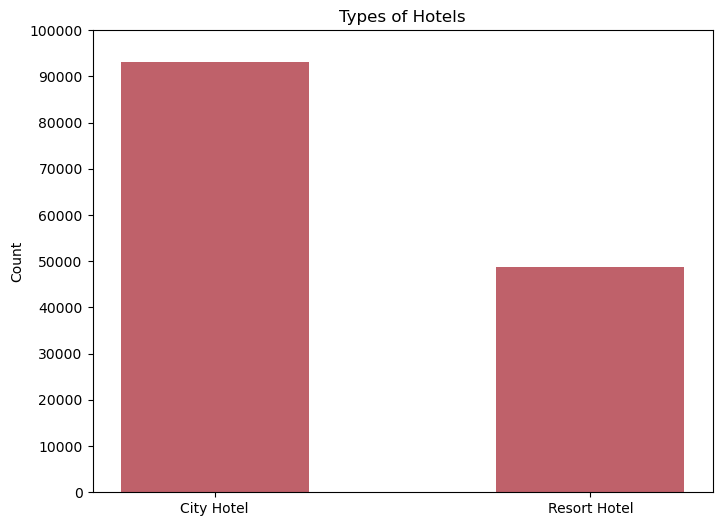

In [236]:
plt.figure(figsize = (8, 6))
plt.bar(x = hotel_df['hotel'].value_counts().index, height = hotel_df['hotel'].value_counts().values, color = fav_cols[0], width = 0.5)
plt.xlabel(xlabel = '')
plt.ylabel(ylabel = 'Count')
plt.yticks(ticks = list(range(0, 110000, 10000)))
plt.title(label = 'Types of Hotels')
plt.savefig(fname = os.path.join(os.getcwd(), 'outputs', 'visuals', 'Hotel_types'))
plt.show();

###  Is_Canceled

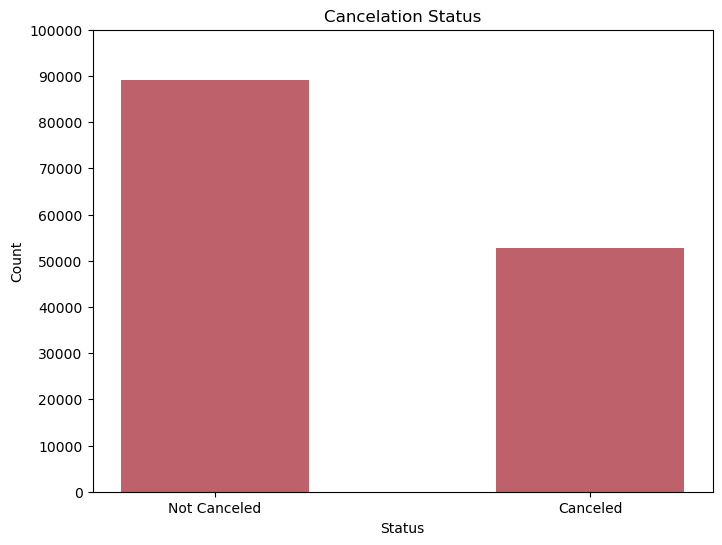

In [237]:
plt.figure(figsize = (8, 6))
plt.bar(x = hotel_df['is_canceled'].value_counts().index, height = hotel_df['is_canceled'].value_counts().values, color = fav_cols[0], width = 0.5)
plt.xticks(ticks = [0, 1], labels = ['Not Canceled', 'Canceled'])
plt.yticks(ticks = list(range(0, 110000, 10000)))
plt.xlabel(xlabel = 'Status')
plt.ylabel(ylabel = 'Count')
plt.title(label = 'Cancelation Status')
plt.savefig(fname = os.path.join(os.getcwd(), 'outputs', 'visuals', 'Cancelation_status'))
plt.show();

### Lead_time

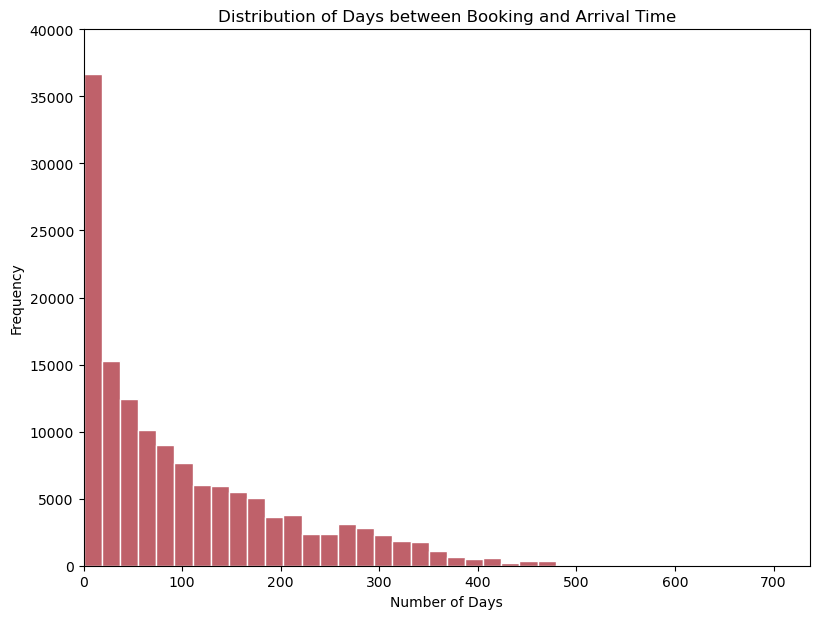

In [238]:
plt.figure(figsize = (8, 6))
plt.hist(x = hotel_df['lead_time'], bins = 40, color = fav_cols[0], edgecolor = 'white')
plt.xlabel(xlabel = 'Number of Days')
plt.ylabel(ylabel = 'Frequency')
plt.yticks(ticks = list(range(0, 45000, 5000)))
plt.title(label = 'Distribution of Days between Booking and Arrival Time')
plt.tight_layout(pad = 0)
plt.margins(x = 0)
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Distribution_days_before_booking'))
plt.show();

### arrival_date_year


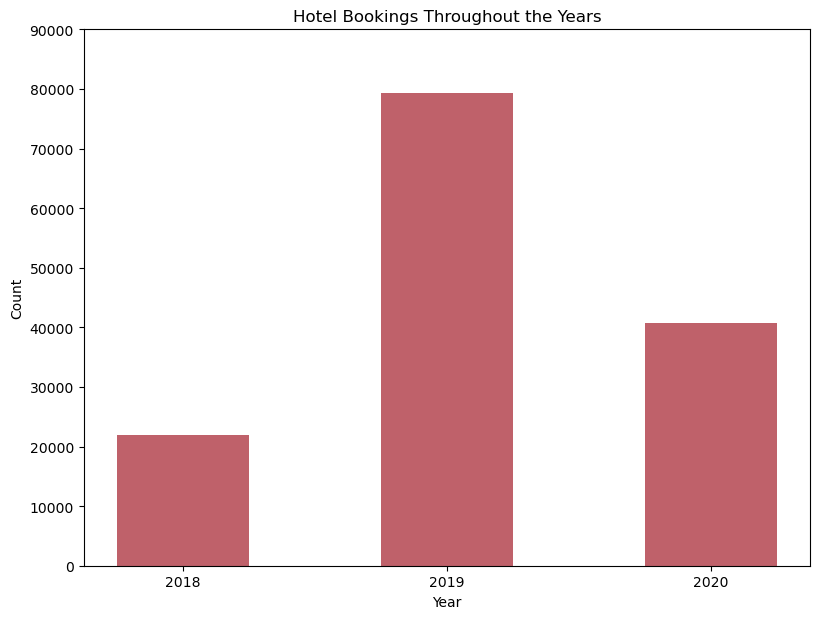

In [239]:
plt.figure(figsize = (8, 6))
plt.bar(x = hotel_df['arrival_date_year'].value_counts().index, height = hotel_df['arrival_date_year'].value_counts().values, width = 0.5, color = fav_cols[0])
plt.xlabel(xlabel = 'Year')
plt.ylabel(ylabel = 'Count')
plt.yticks(ticks = list(range(0, 100000, 10000)))
plt.xticks(ticks = [2018, 2019, 2020])
plt.title(label = 'Hotel Bookings Throughout the Years')
plt.tight_layout(pad = 0)
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Yearly_bookings'))
plt.show();

### arrival_date_month	

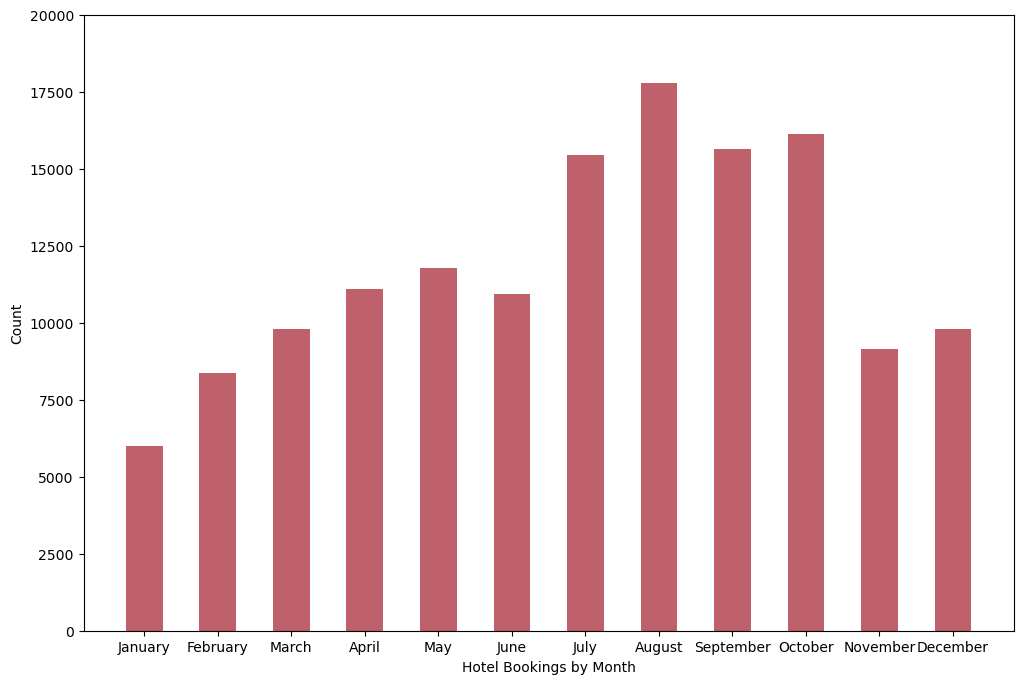

In [240]:
plt.figure(figsize = (12, 8))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

hotel_df['arrival_date_month'] = pd.Categorical(values = hotel_df['arrival_date_month'], categories = months, ordered = True)
months_df = hotel_df['arrival_date_month'].value_counts().reindex(months)
plt.bar(x = months_df.index, height = months_df.values, width = 0.5, color = fav_cols[0])
plt.yticks(ticks = list(range(0, 22500, 2500)))
plt.ylabel(ylabel = 'Count')
plt.xlabel(xlabel = 'Hotel Bookings by Month')
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Booking_by_Month'))


### arrival_date_week_number

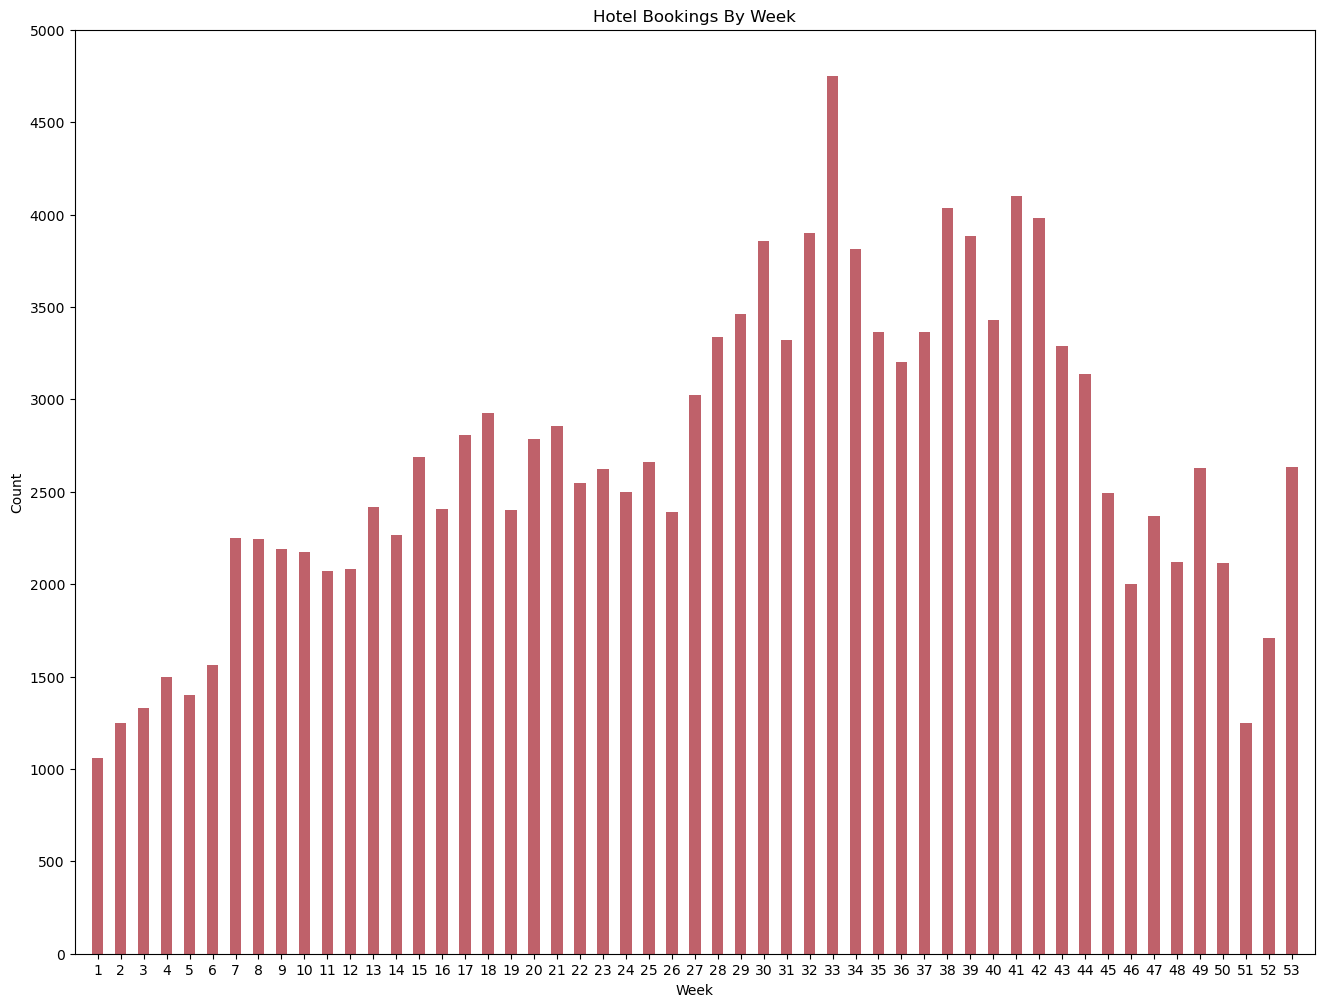

In [241]:
week_num = hotel_df['arrival_date_week_number'].value_counts().sort_index()

plt.figure(figsize = (16,12))
plt.bar(x = week_num.index, height = week_num.values, width = 0.5, color = fav_cols[0])
plt.ylabel(ylabel = 'Count')
plt.xlabel(xlabel = 'Week')
plt.title(label = 'Hotel Bookings By Week')
plt.yticks(ticks = list(range(0, 5500, 500)))
plt.xlim((0,54))
plt.xticks(ticks = list(range(1, 54, 1)))
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Booking_by_week'))
plt.show();

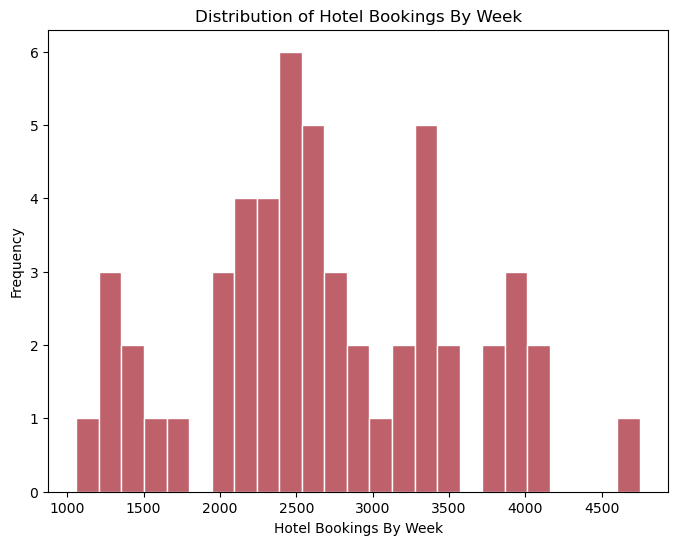

In [242]:
plt.figure(figsize = (8, 6))
plt.hist(x = week_num, bins = 25, color = fav_cols[0], edgecolor = 'white')
plt.xlabel(xlabel = 'Hotel Bookings By Week')
plt.ylabel(ylabel = 'Frequency')
plt.title(label = 'Distribution of Hotel Bookings By Week')
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Distribution_Booking_by_week'))
plt.show();

### arrival_date_day_of_month	

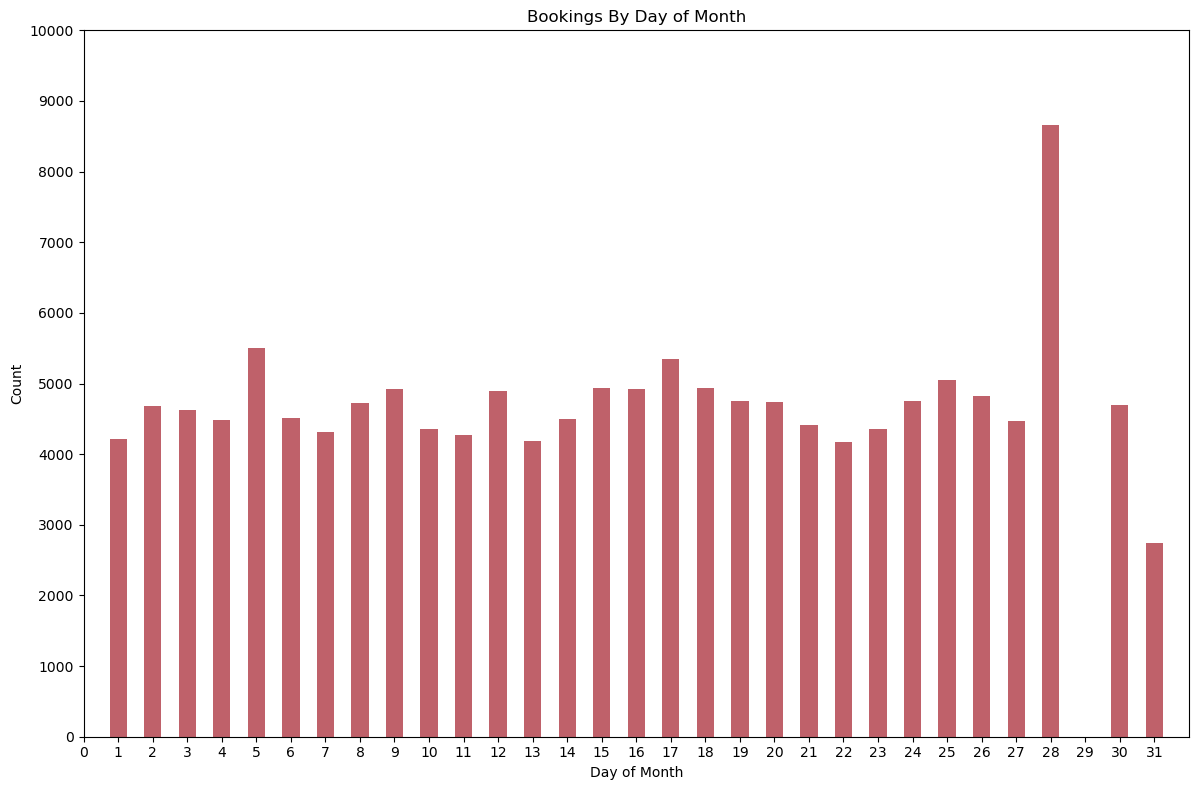

In [243]:
arrival_day = hotel_df['arrival_date_day_of_month'].value_counts().sort_index()

plt.figure(figsize = (12, 8))
plt.bar(x = arrival_day.index, height = arrival_day.values, width = 0.5, color = fav_cols[0])
plt.ylabel(ylabel = 'Count')
plt.xlabel(xlabel = 'Day of Month')
plt.title(label = 'Bookings By Day of Month')
plt.tight_layout()
plt.xlim((0,32))
plt.xticks(ticks = list(range(0, 32, 1)))
plt.yticks(ticks = list(range(0, 11000, 1000 )))
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Booking_By_Day_of_Month'))
plt.show();

The data does not contain any data, for the 29th of any month. This is likely due to preprocessing of the data.

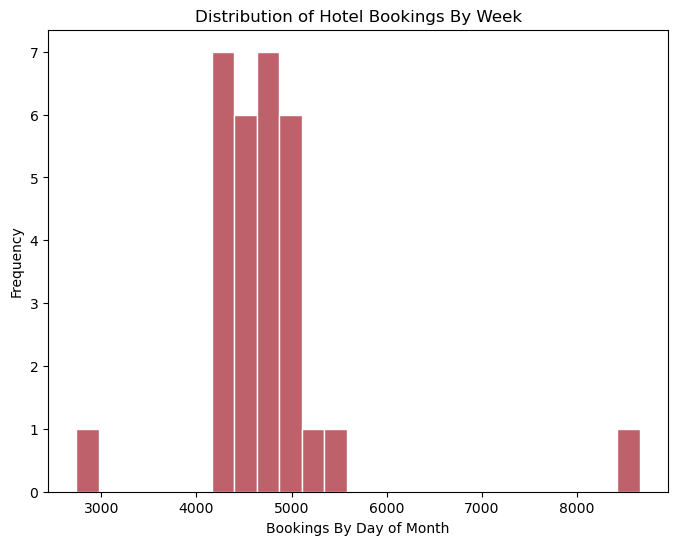

In [244]:
plt.figure(figsize = (8, 6))
plt.hist(x = arrival_day, bins = 25, color = fav_cols[0], edgecolor = 'white')
plt.xlabel(xlabel = 'Bookings By Day of Month')
plt.ylabel(ylabel = 'Frequency')
plt.title(label = 'Distribution of Hotel Bookings By Week')
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Distribution_Booking_by_Day_of_Month'))
plt.show();

### stays_in_weekend_nights

The `stays_in_weekend_nights` indicates the number of weekend nights that a guested stayed at a hotel. Most hotels define weekend nights as Friday and Saturaday.

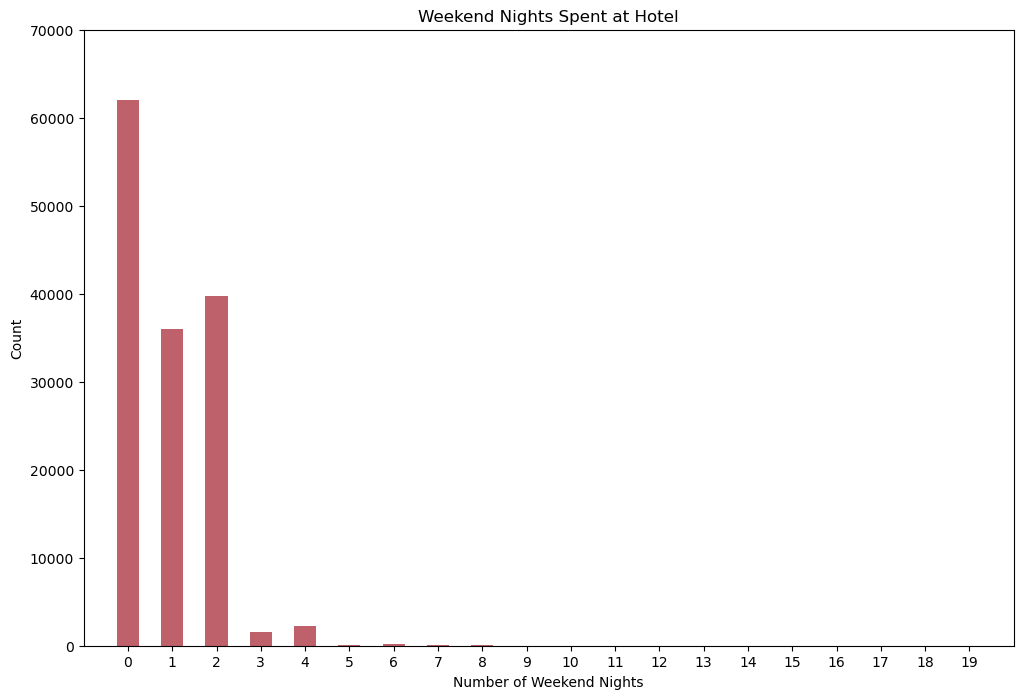

In [245]:
stay_in_weekend = hotel_df['stays_in_weekend_nights'].value_counts().sort_index()

plt.figure(figsize = (12, 8))
plt.bar(x = stay_in_weekend.index, height = stay_in_weekend.values, width = 0.5, color = fav_cols[0])
plt.xlim((-1, 20))
plt.xticks(ticks = list(range(0,20,1)))
plt.ylabel(ylabel = 'Count')
plt.yticks(ticks = list(range(0, 80000, 10000)))
plt.title(label = 'Weekend Nights Spent at Hotel')
plt.xlabel(xlabel = 'Number of Weekend Nights')
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Weekend_Nights_at_Hotels'))
plt.show();

### stays_in_week_nights

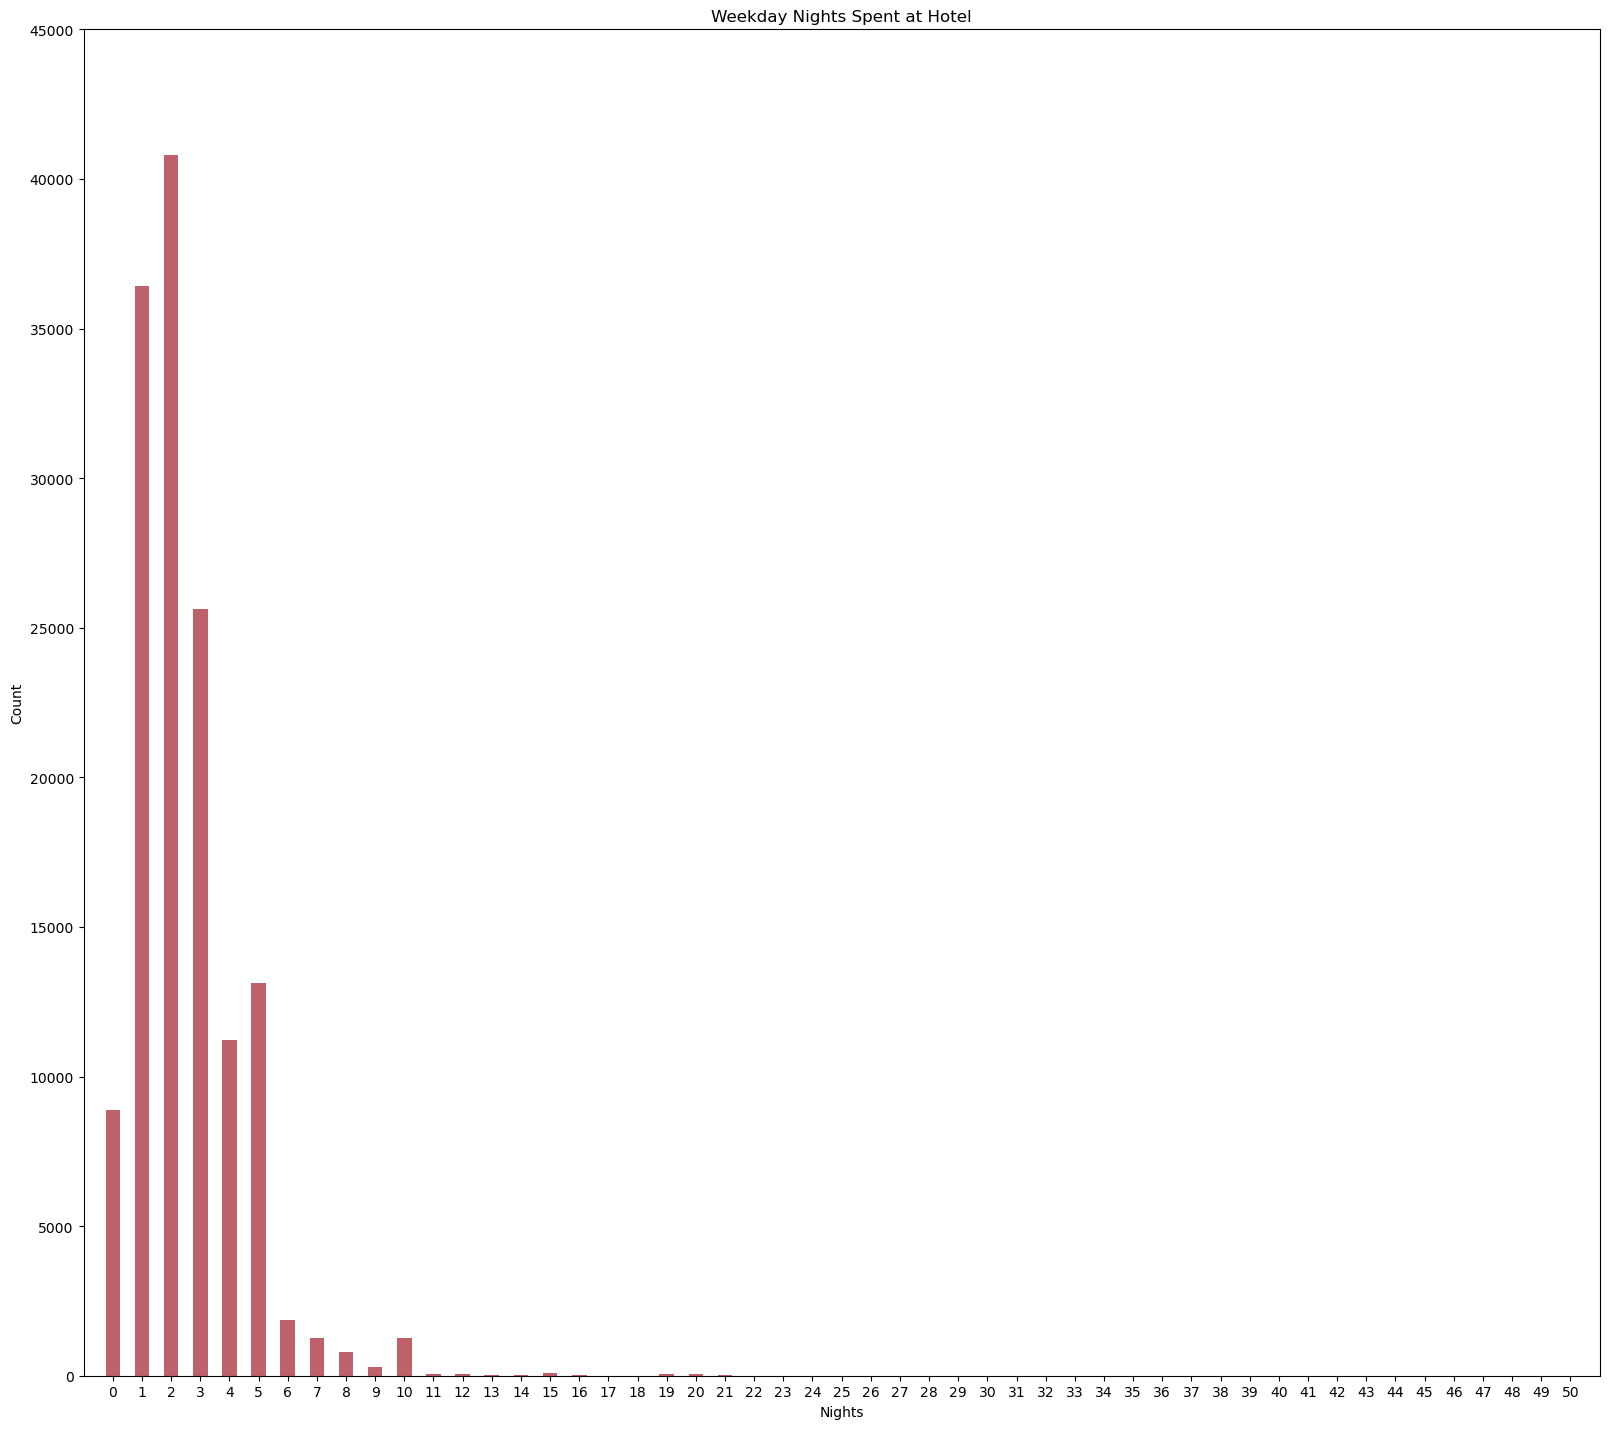

In [246]:
stay_in_week = hotel_df['stays_in_week_nights'].value_counts().sort_index()

plt.figure(figsize = (16, 14))
plt.bar(x = stay_in_week.index, height = stay_in_week.values, width = 0.5, color = fav_cols[0])
plt.tight_layout()
plt.xlabel(xlabel = 'Nights')
plt.ylabel(ylabel = 'Count')
plt.title(label = 'Weekday Nights Spent at Hotel')
plt.xlim((-1, 51))
plt.ylabel(ylabel = 'Count')
plt.yticks(ticks = list(range(0, 50000, 5000)))
plt.xticks(ticks = list(range(0, stay_in_week.index.max() + 1, 1)))
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Weekday_Nights_at_Hotels'))
plt.show();

### adults

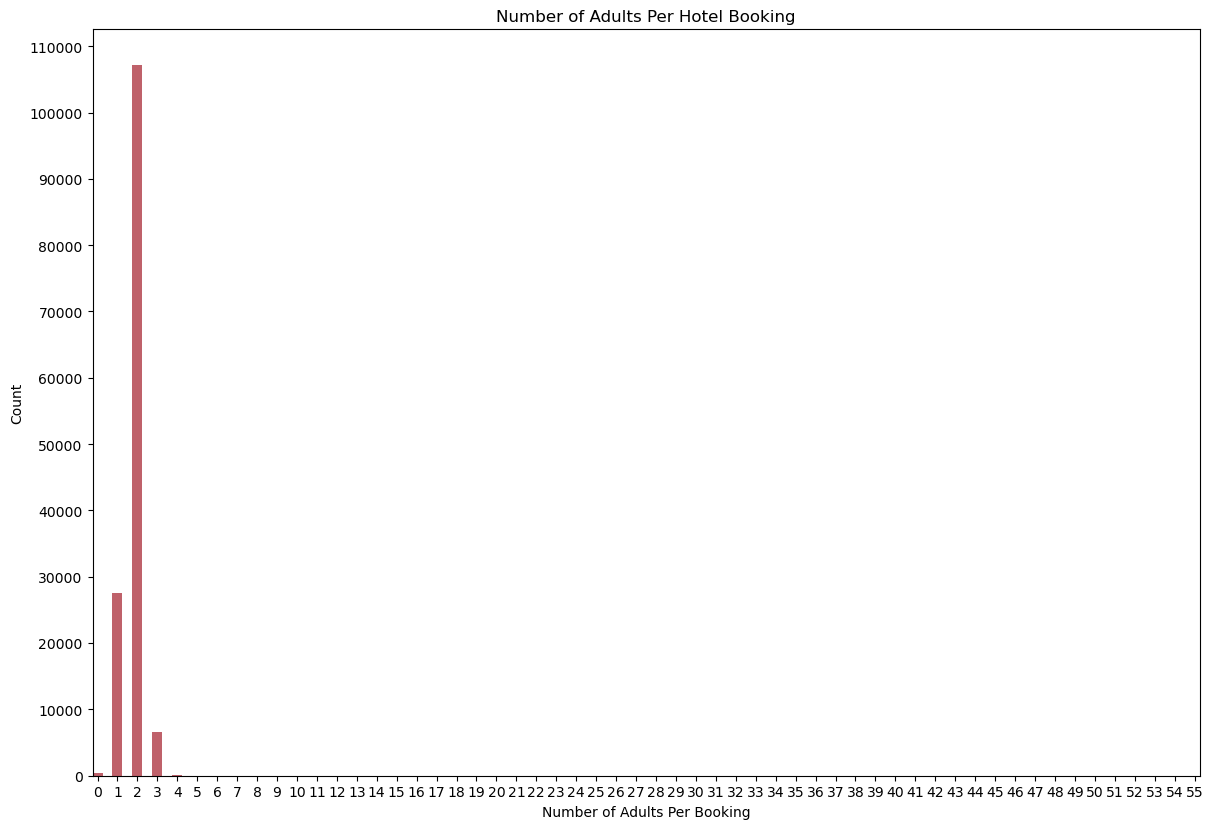

In [247]:
adults = hotel_df['adults'].value_counts().sort_index()
plt.figure(figsize=(12,8))
plt.bar(x = adults.index, height = adults.values, color = fav_cols[0], width = 0.5)
plt.tight_layout()
plt.xlabel(xlabel = 'Number of Adults Per Booking')
plt.ylabel(ylabel='Count')
plt.title(label = 'Number of Adults Per Hotel Booking')
plt.xticks(ticks = list(range(0, adults.index.max()+1)))
plt.yticks(ticks = list(range(0, 120000, 10000)))
plt.margins(x = 0)
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Adults_per_booking'))
plt.show();

### children

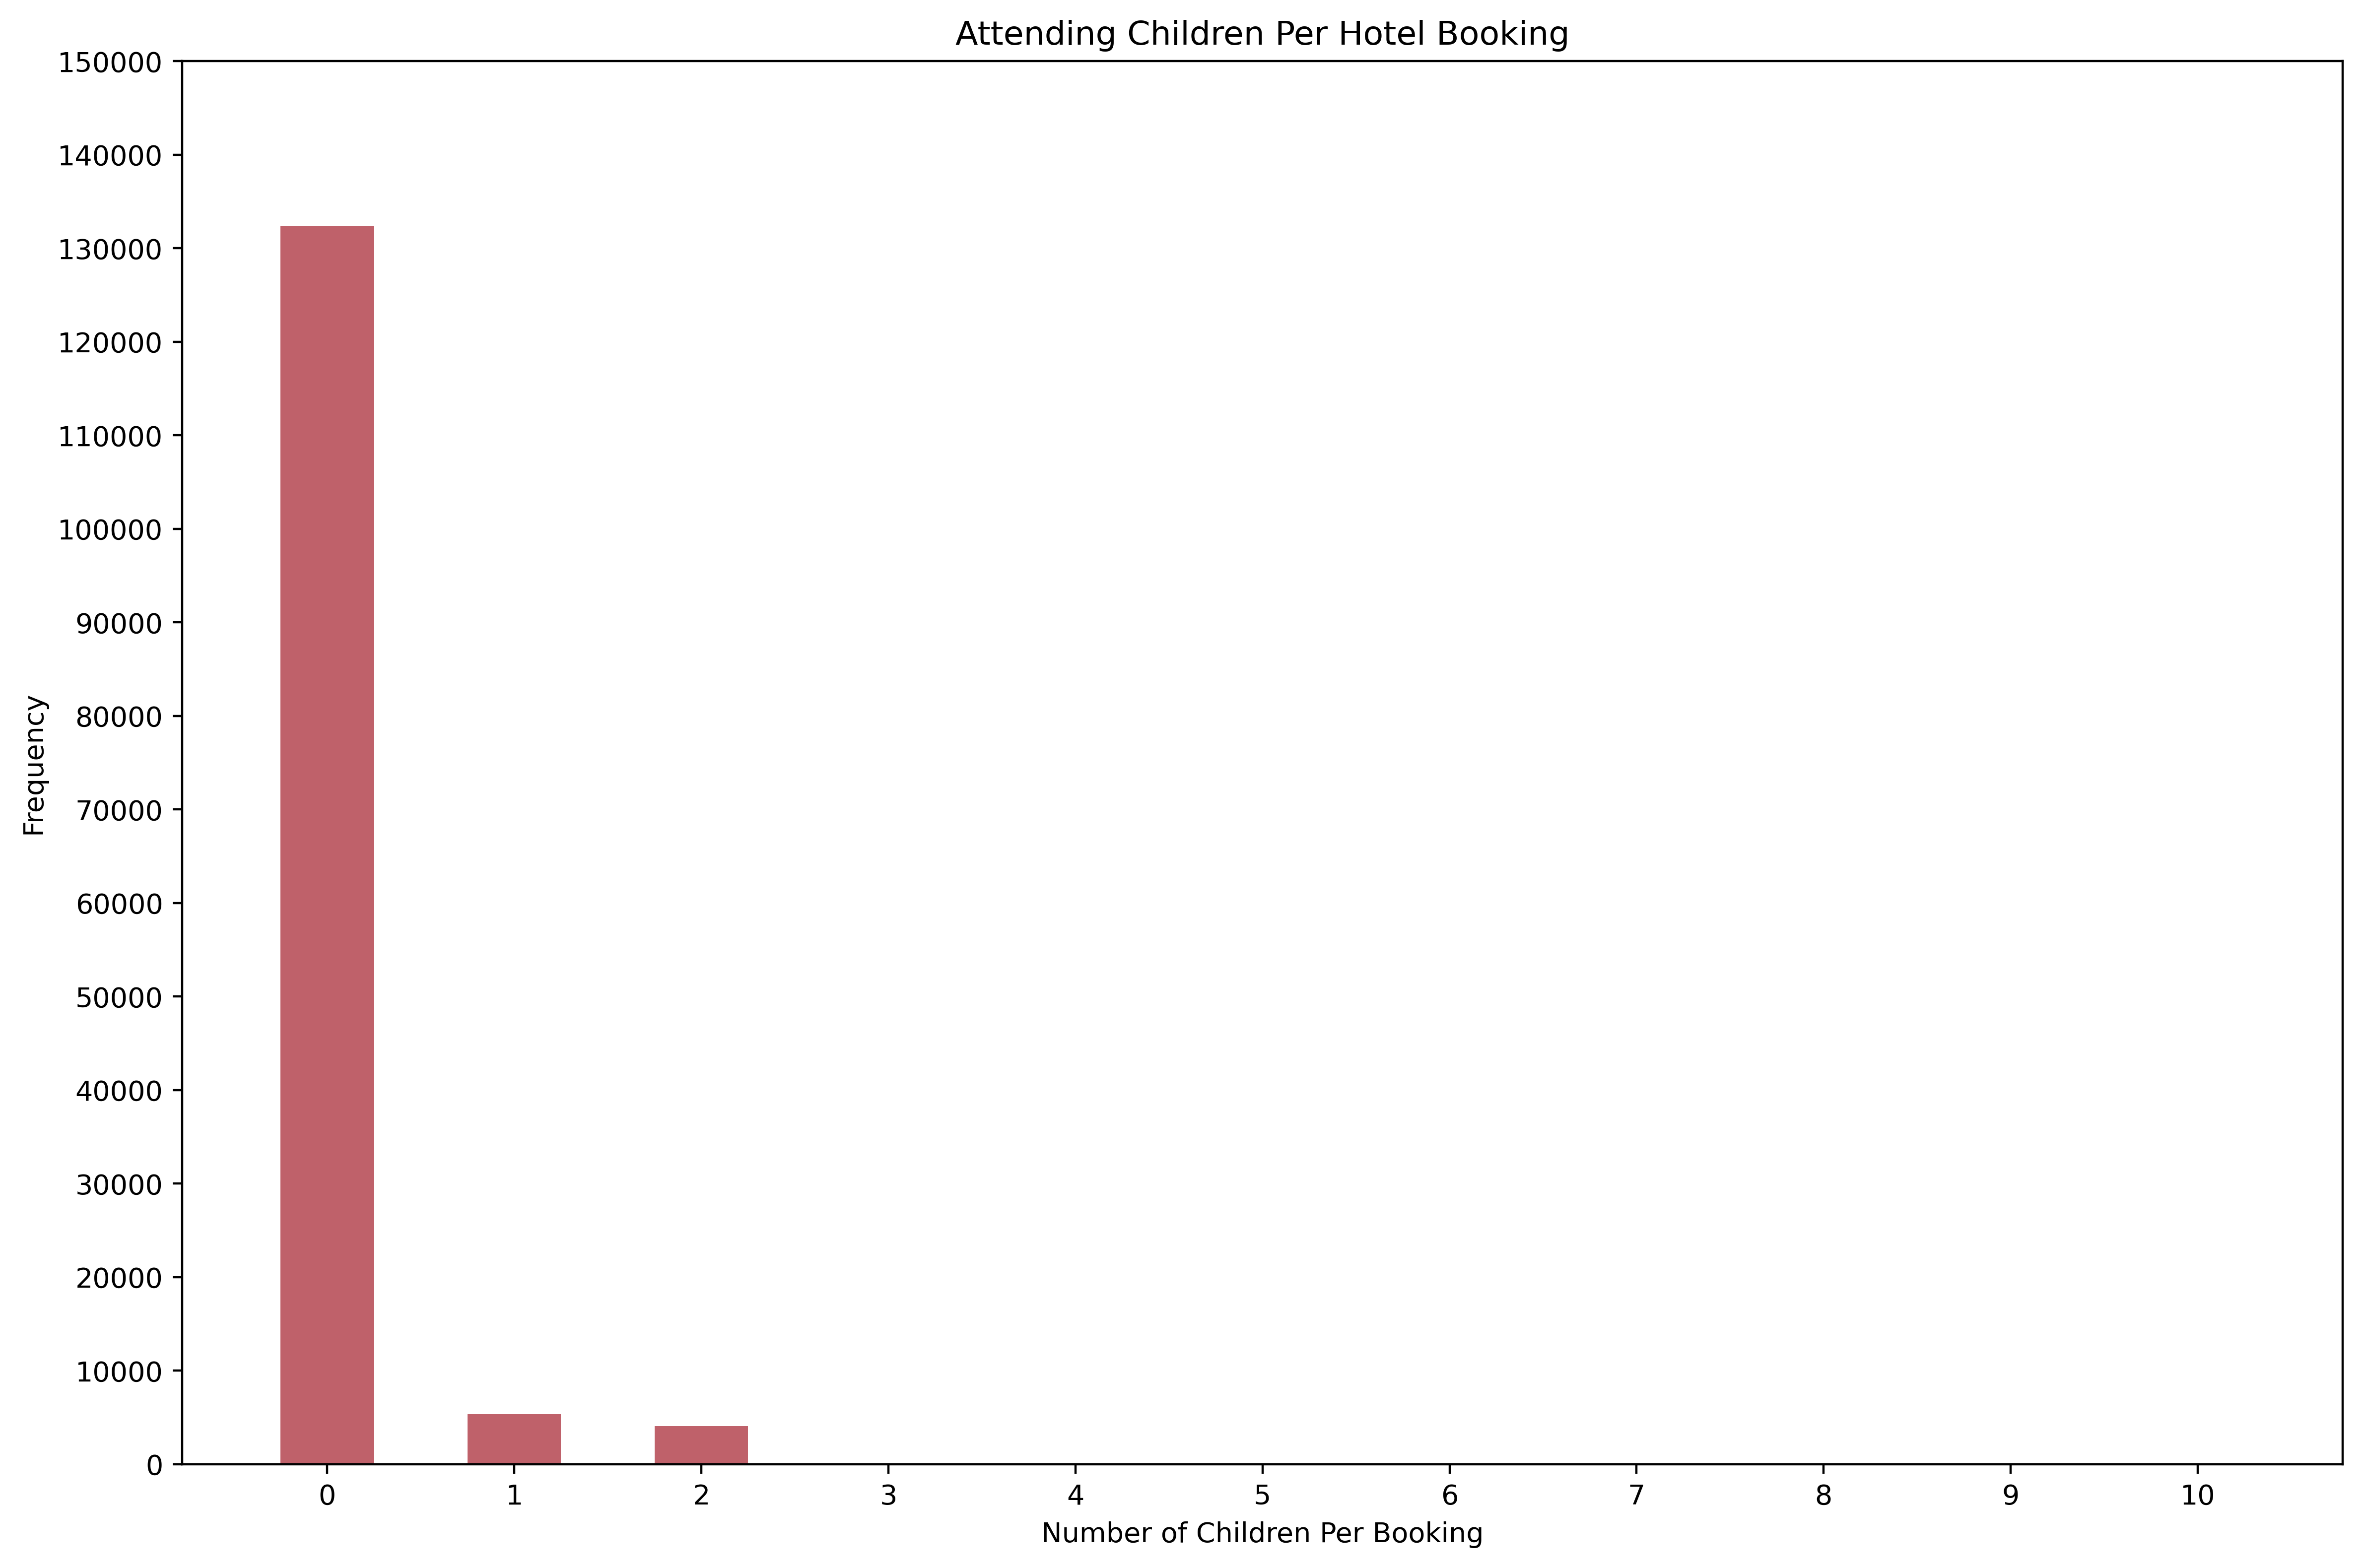

In [248]:
children = hotel_df['children'].value_counts().sort_index()

plt.figure(figsize=(12,8), dpi=400)
plt.bar(x = children.index, height = children.values, color = fav_cols[0], width = 0.5)
plt.xlabel(xlabel = 'Number of Children Per Booking')
plt.ylabel(ylabel = 'Frequency')
plt.title(label = 'Attending Children Per Hotel Booking')
plt.tight_layout()
plt.xticks(ticks = list(range(0, int(children.index.max() + 1), 1)))
plt.yticks(ticks = list(range(0, 160000, 10000)))
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Children_Per_Hotel_Booking'))
plt.show();

### babies

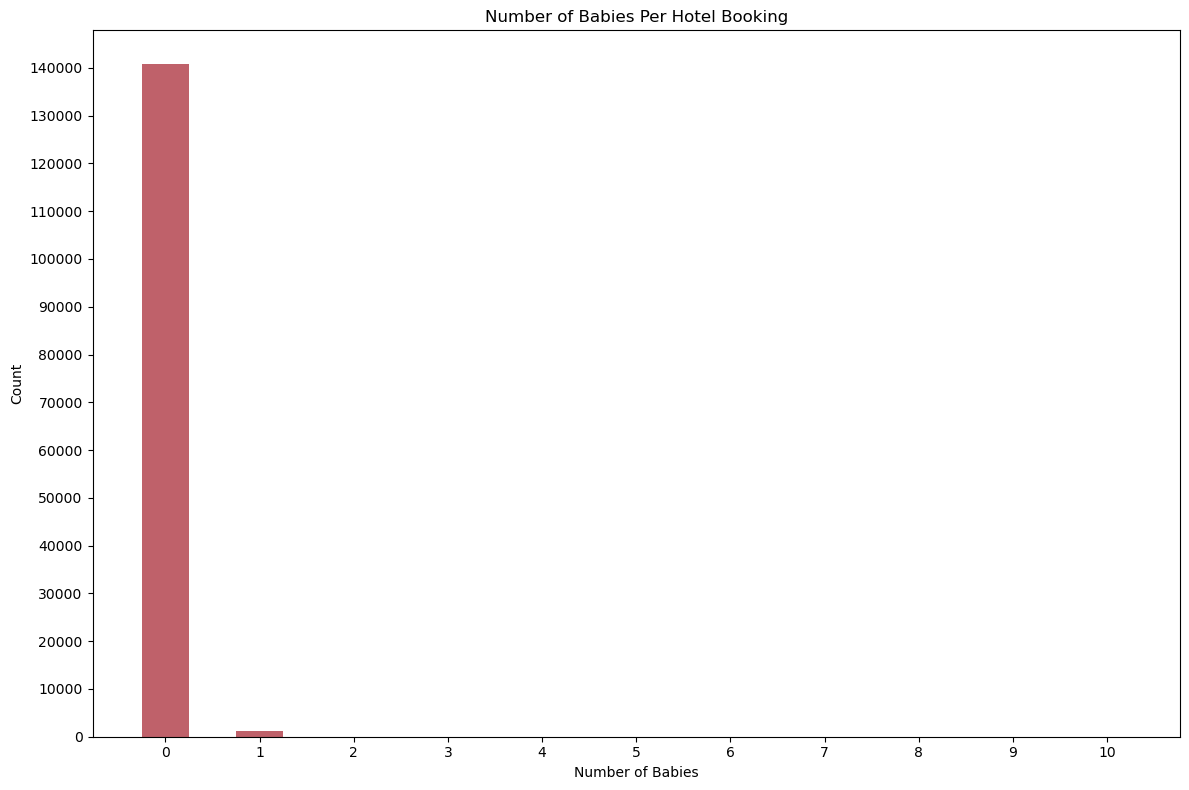

In [249]:
babies = hotel_df['babies'].value_counts().sort_index()
plt.figure(figsize=(12,8))
plt.bar(x = babies.index, height = babies.values, width= 0.5, color = fav_cols[0])
plt.xlabel('Number of Babies')
plt.ylabel('Count')
plt.title('Number of Babies Per Hotel Booking')
plt.xticks(ticks = list(range(babies.index.min(), babies.index.max() + 1, 1)))
plt.yticks(ticks = list(range(0, 150000, 10000)))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Babies_Per_Booking'))
plt.show();

### meal


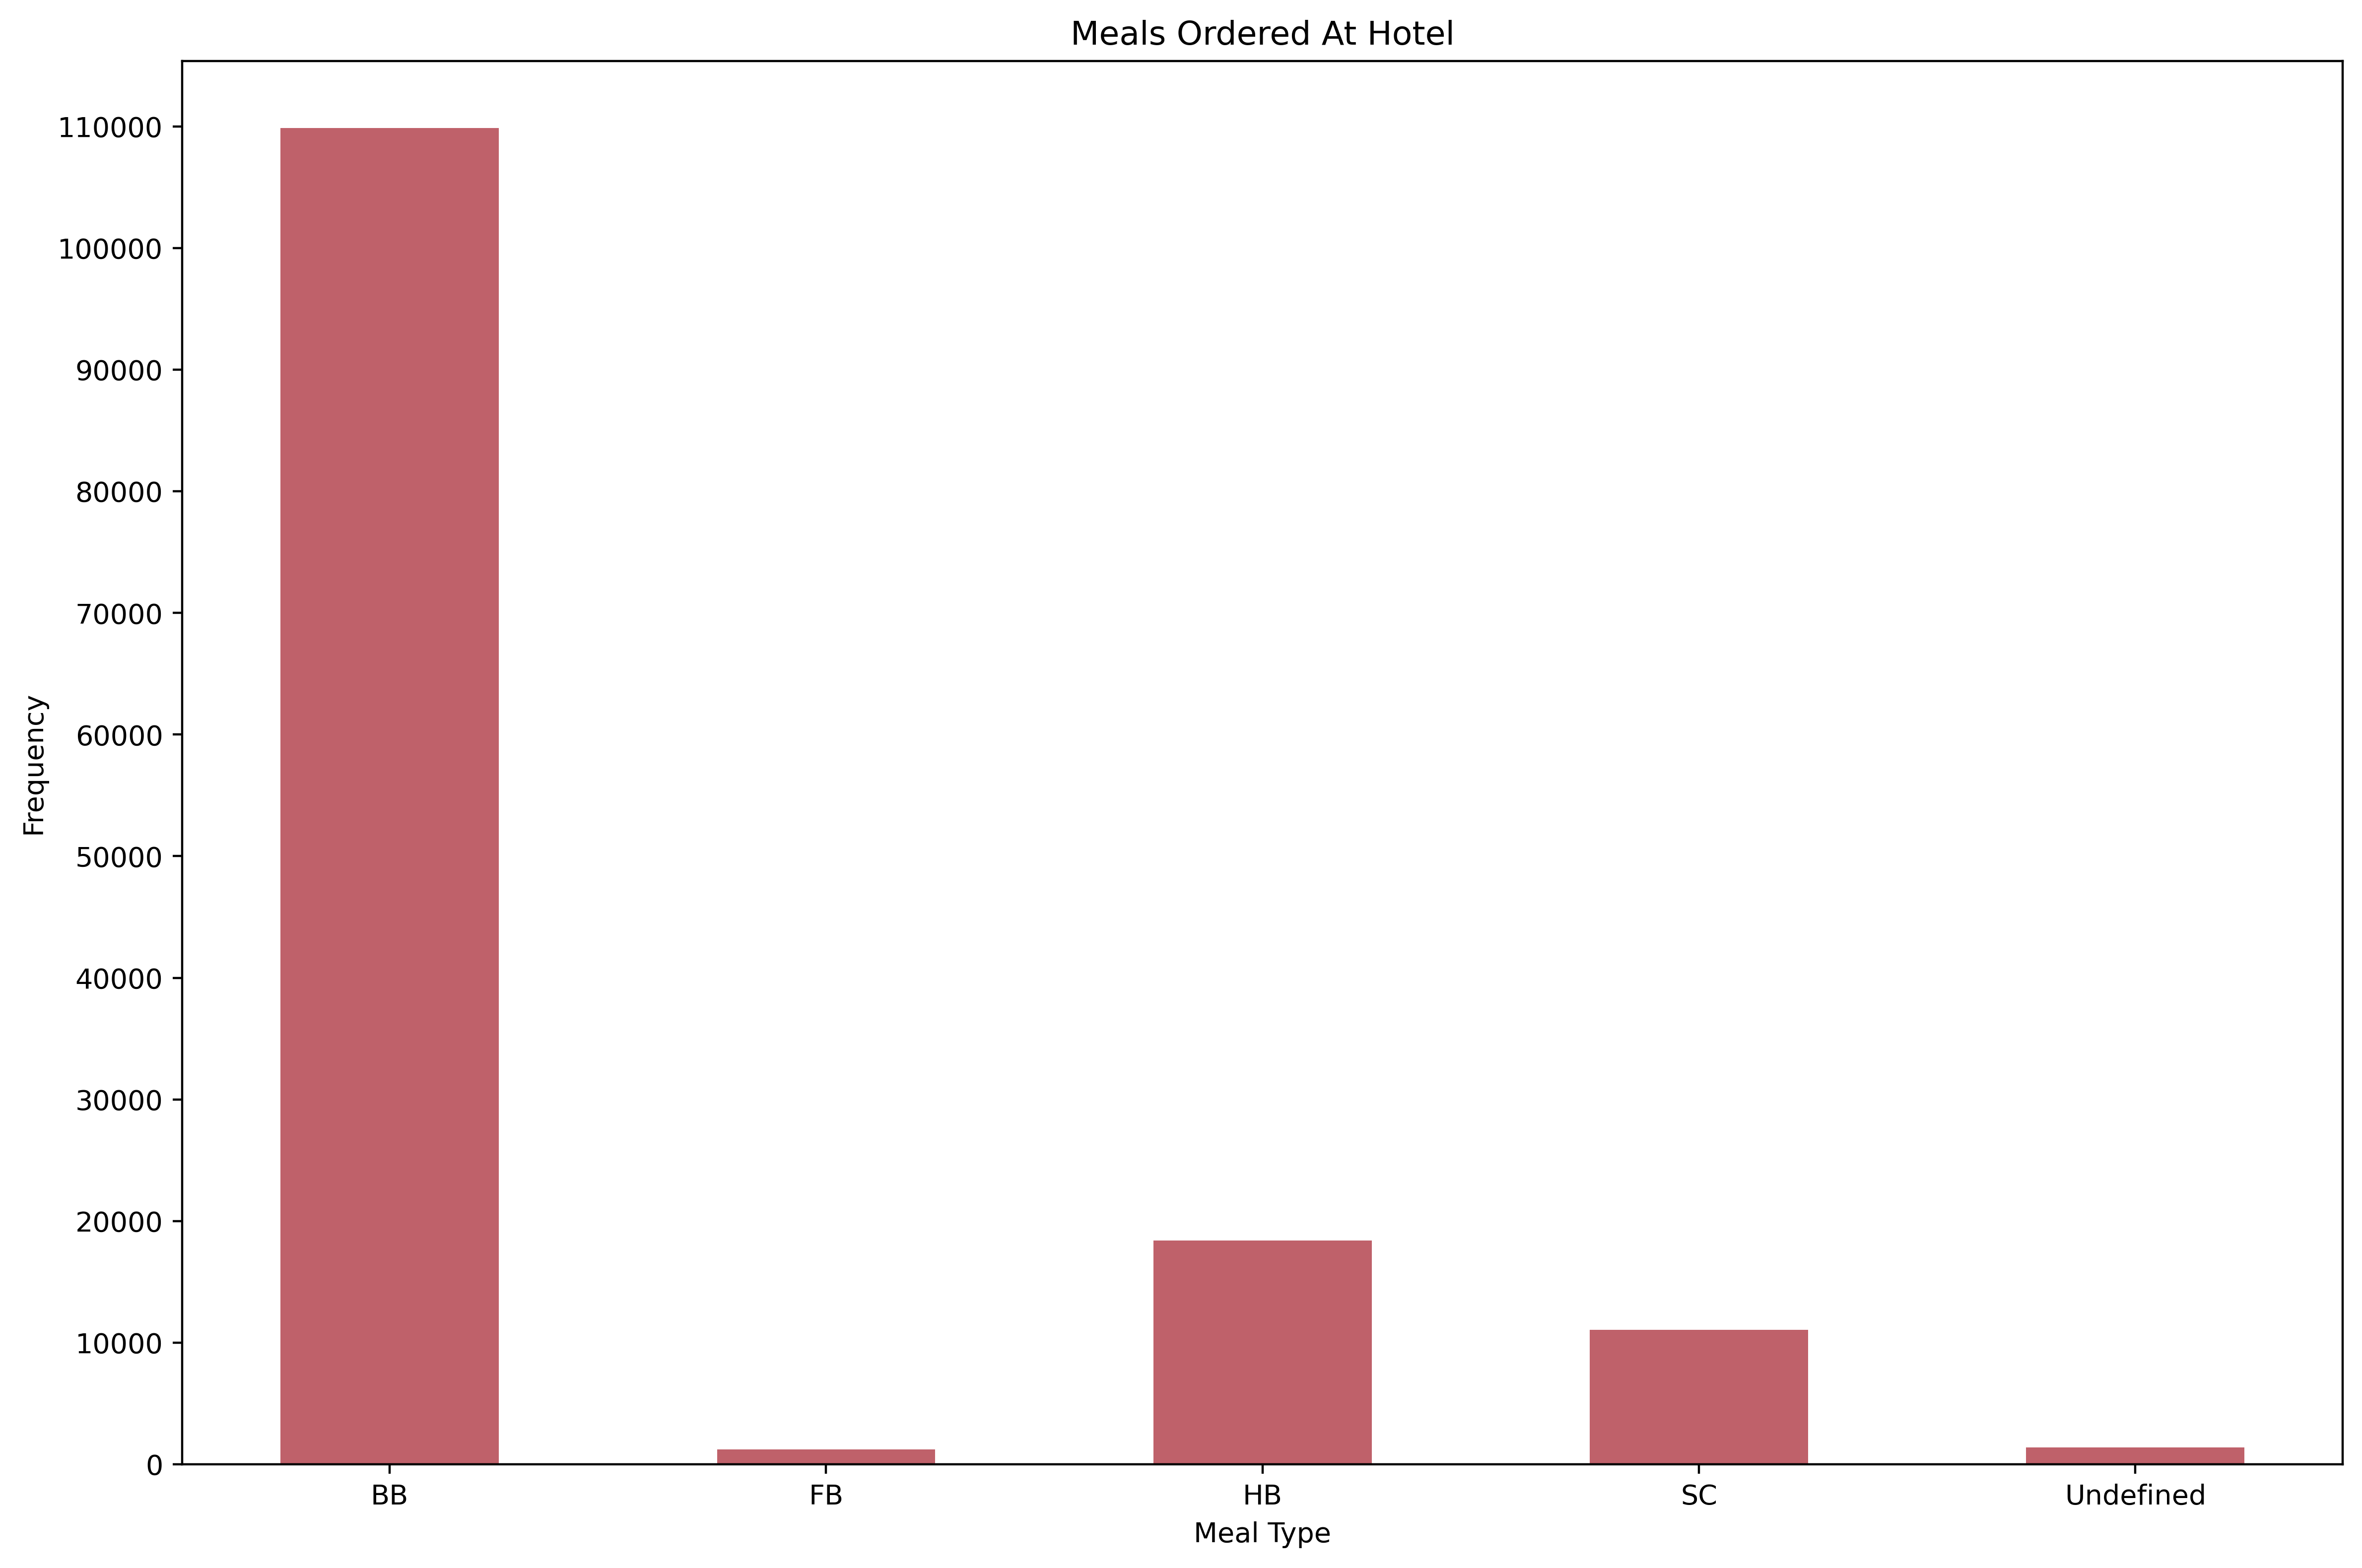

In [250]:
meal = hotel_df['meal'].value_counts().sort_index()
plt.figure(figsize=(12,8), dpi=400)
plt.bar(x = meal.index, height = meal.values, width = 0.5, color = fav_cols[0])
plt.xlabel(xlabel = 'Meal Type')
plt.ylabel(ylabel ='Frequency')
plt.title(label = 'Meals Ordered At Hotel')
plt.tight_layout()
plt.yticks(ticks = list(range(0, 120000, 10000)))
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Meals_Provided_At_Restaruant'))
plt.show();

### country

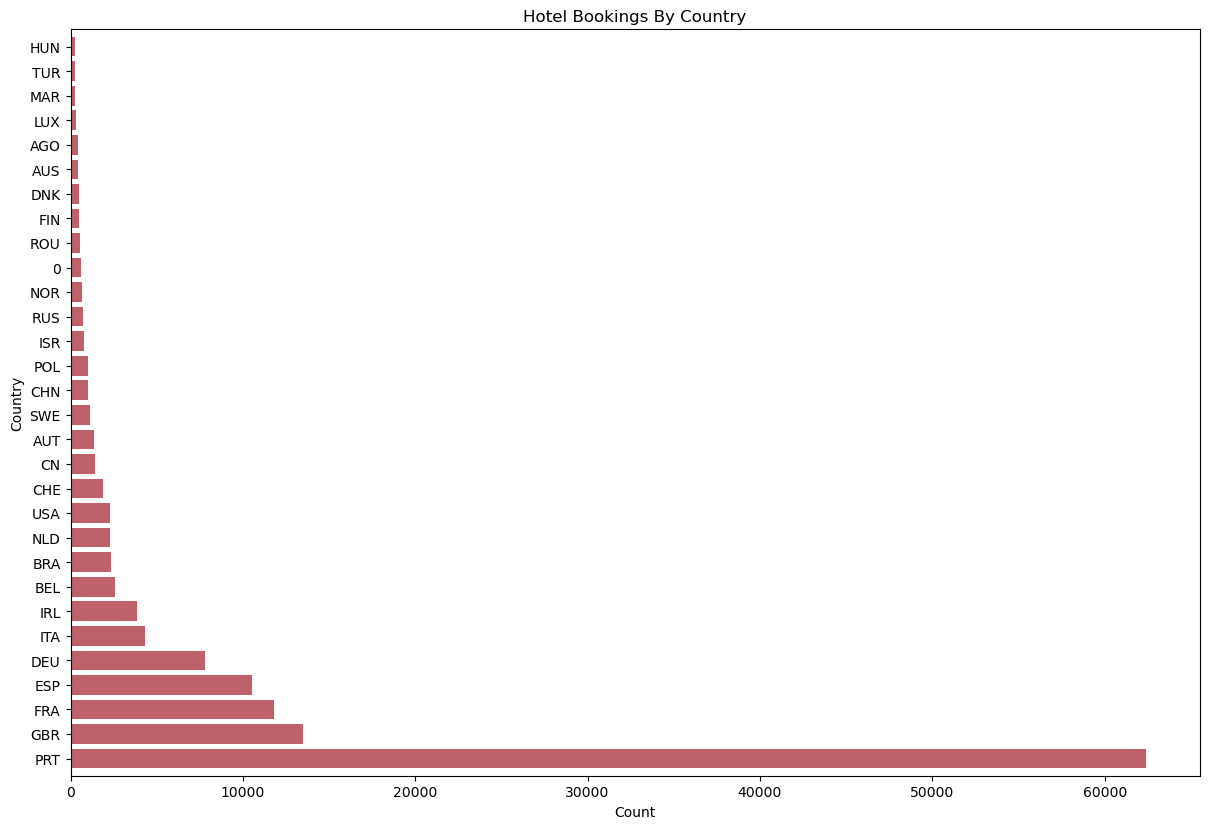

In [251]:
countries = hotel_df['country'].value_counts()
countries.index = countries.index.astype(dtype = str)
plt.figure(figsize=(12,8))
plt.barh(y = countries.index[:30], width = countries.values[:30], color = fav_cols[0])
plt.tight_layout()
plt.margins(y = 0.01)
plt.xlabel(xlabel = 'Count')
plt.ylabel(ylabel = 'Country')
plt.title(label = 'Hotel Bookings By Country')
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Booking_By_Country'))
plt.show();

### market_segment

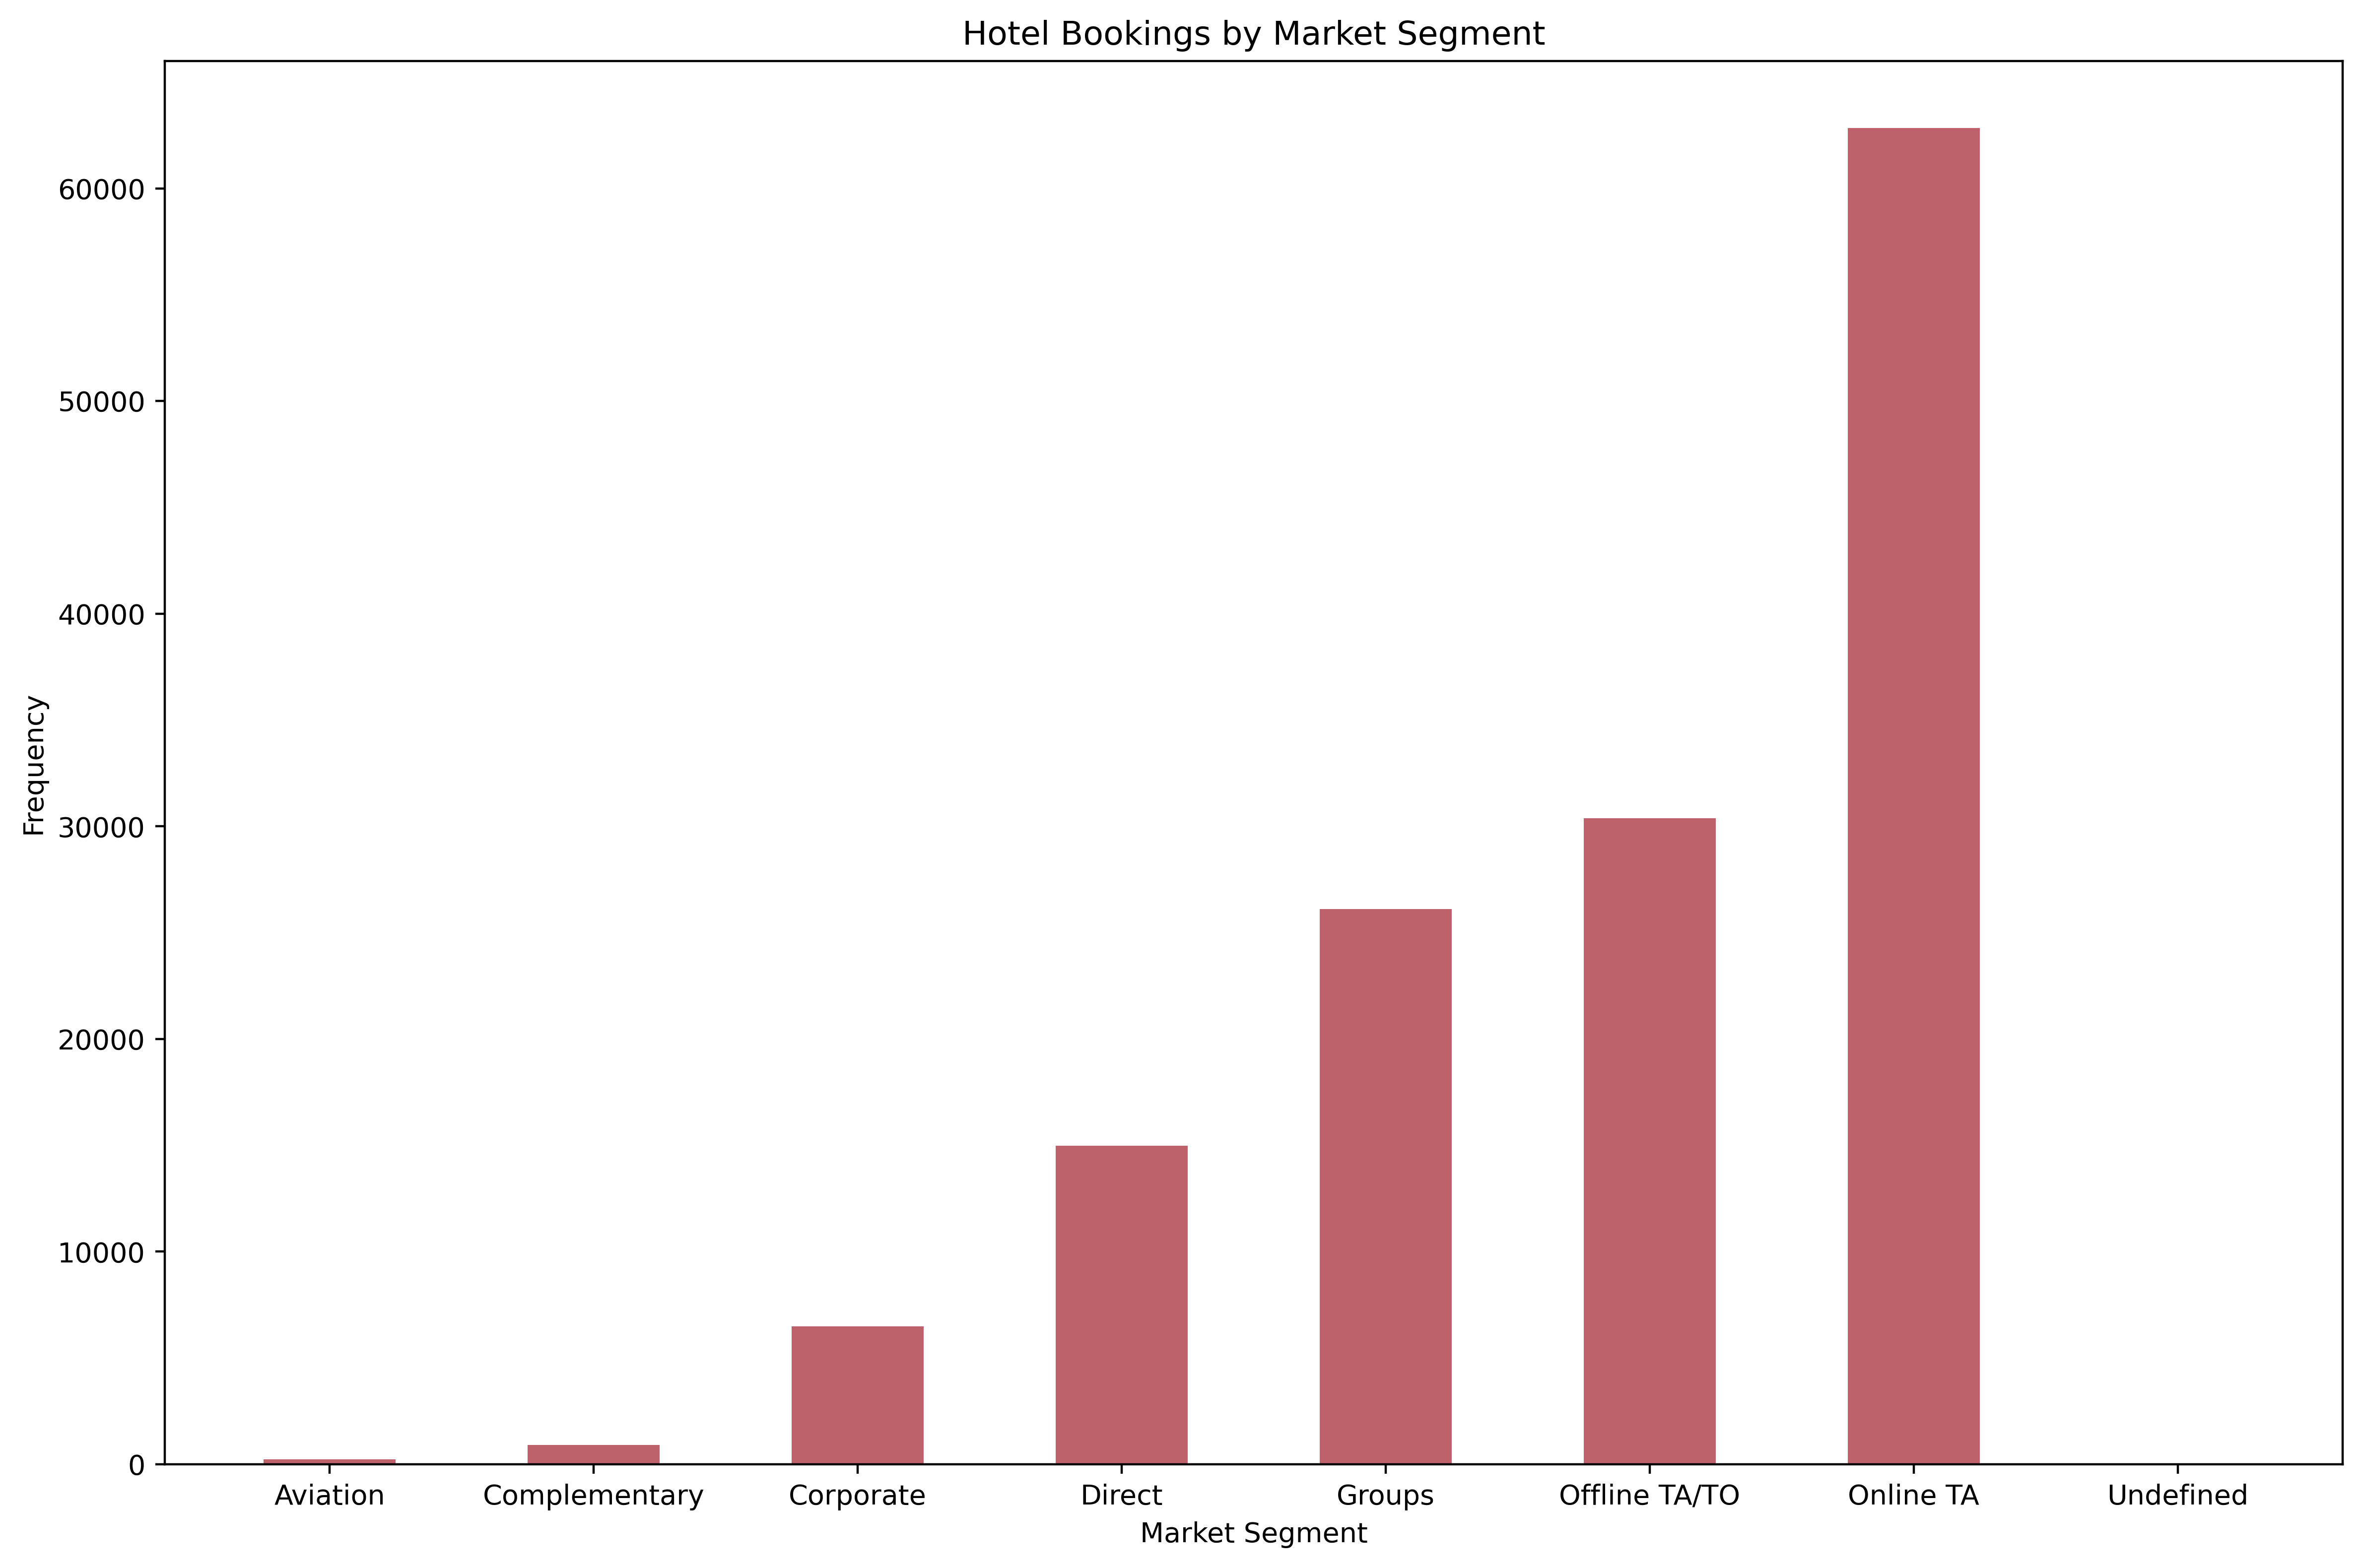

In [252]:
market_segment = hotel_df['market_segment'].value_counts().sort_index()

plt.figure(figsize=(12, 8), dpi=400)
plt.bar(x = market_segment.index, height = market_segment.values, width = 0.5, color=fav_cols[0])
plt.xlabel(xlabel='Market Segment')
plt.ylabel(ylabel = 'Frequency')
plt.title(label = 'Hotel Bookings by Market Segment')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Bookings_By_Market_Segment'))
plt.show()

### distribution_channel

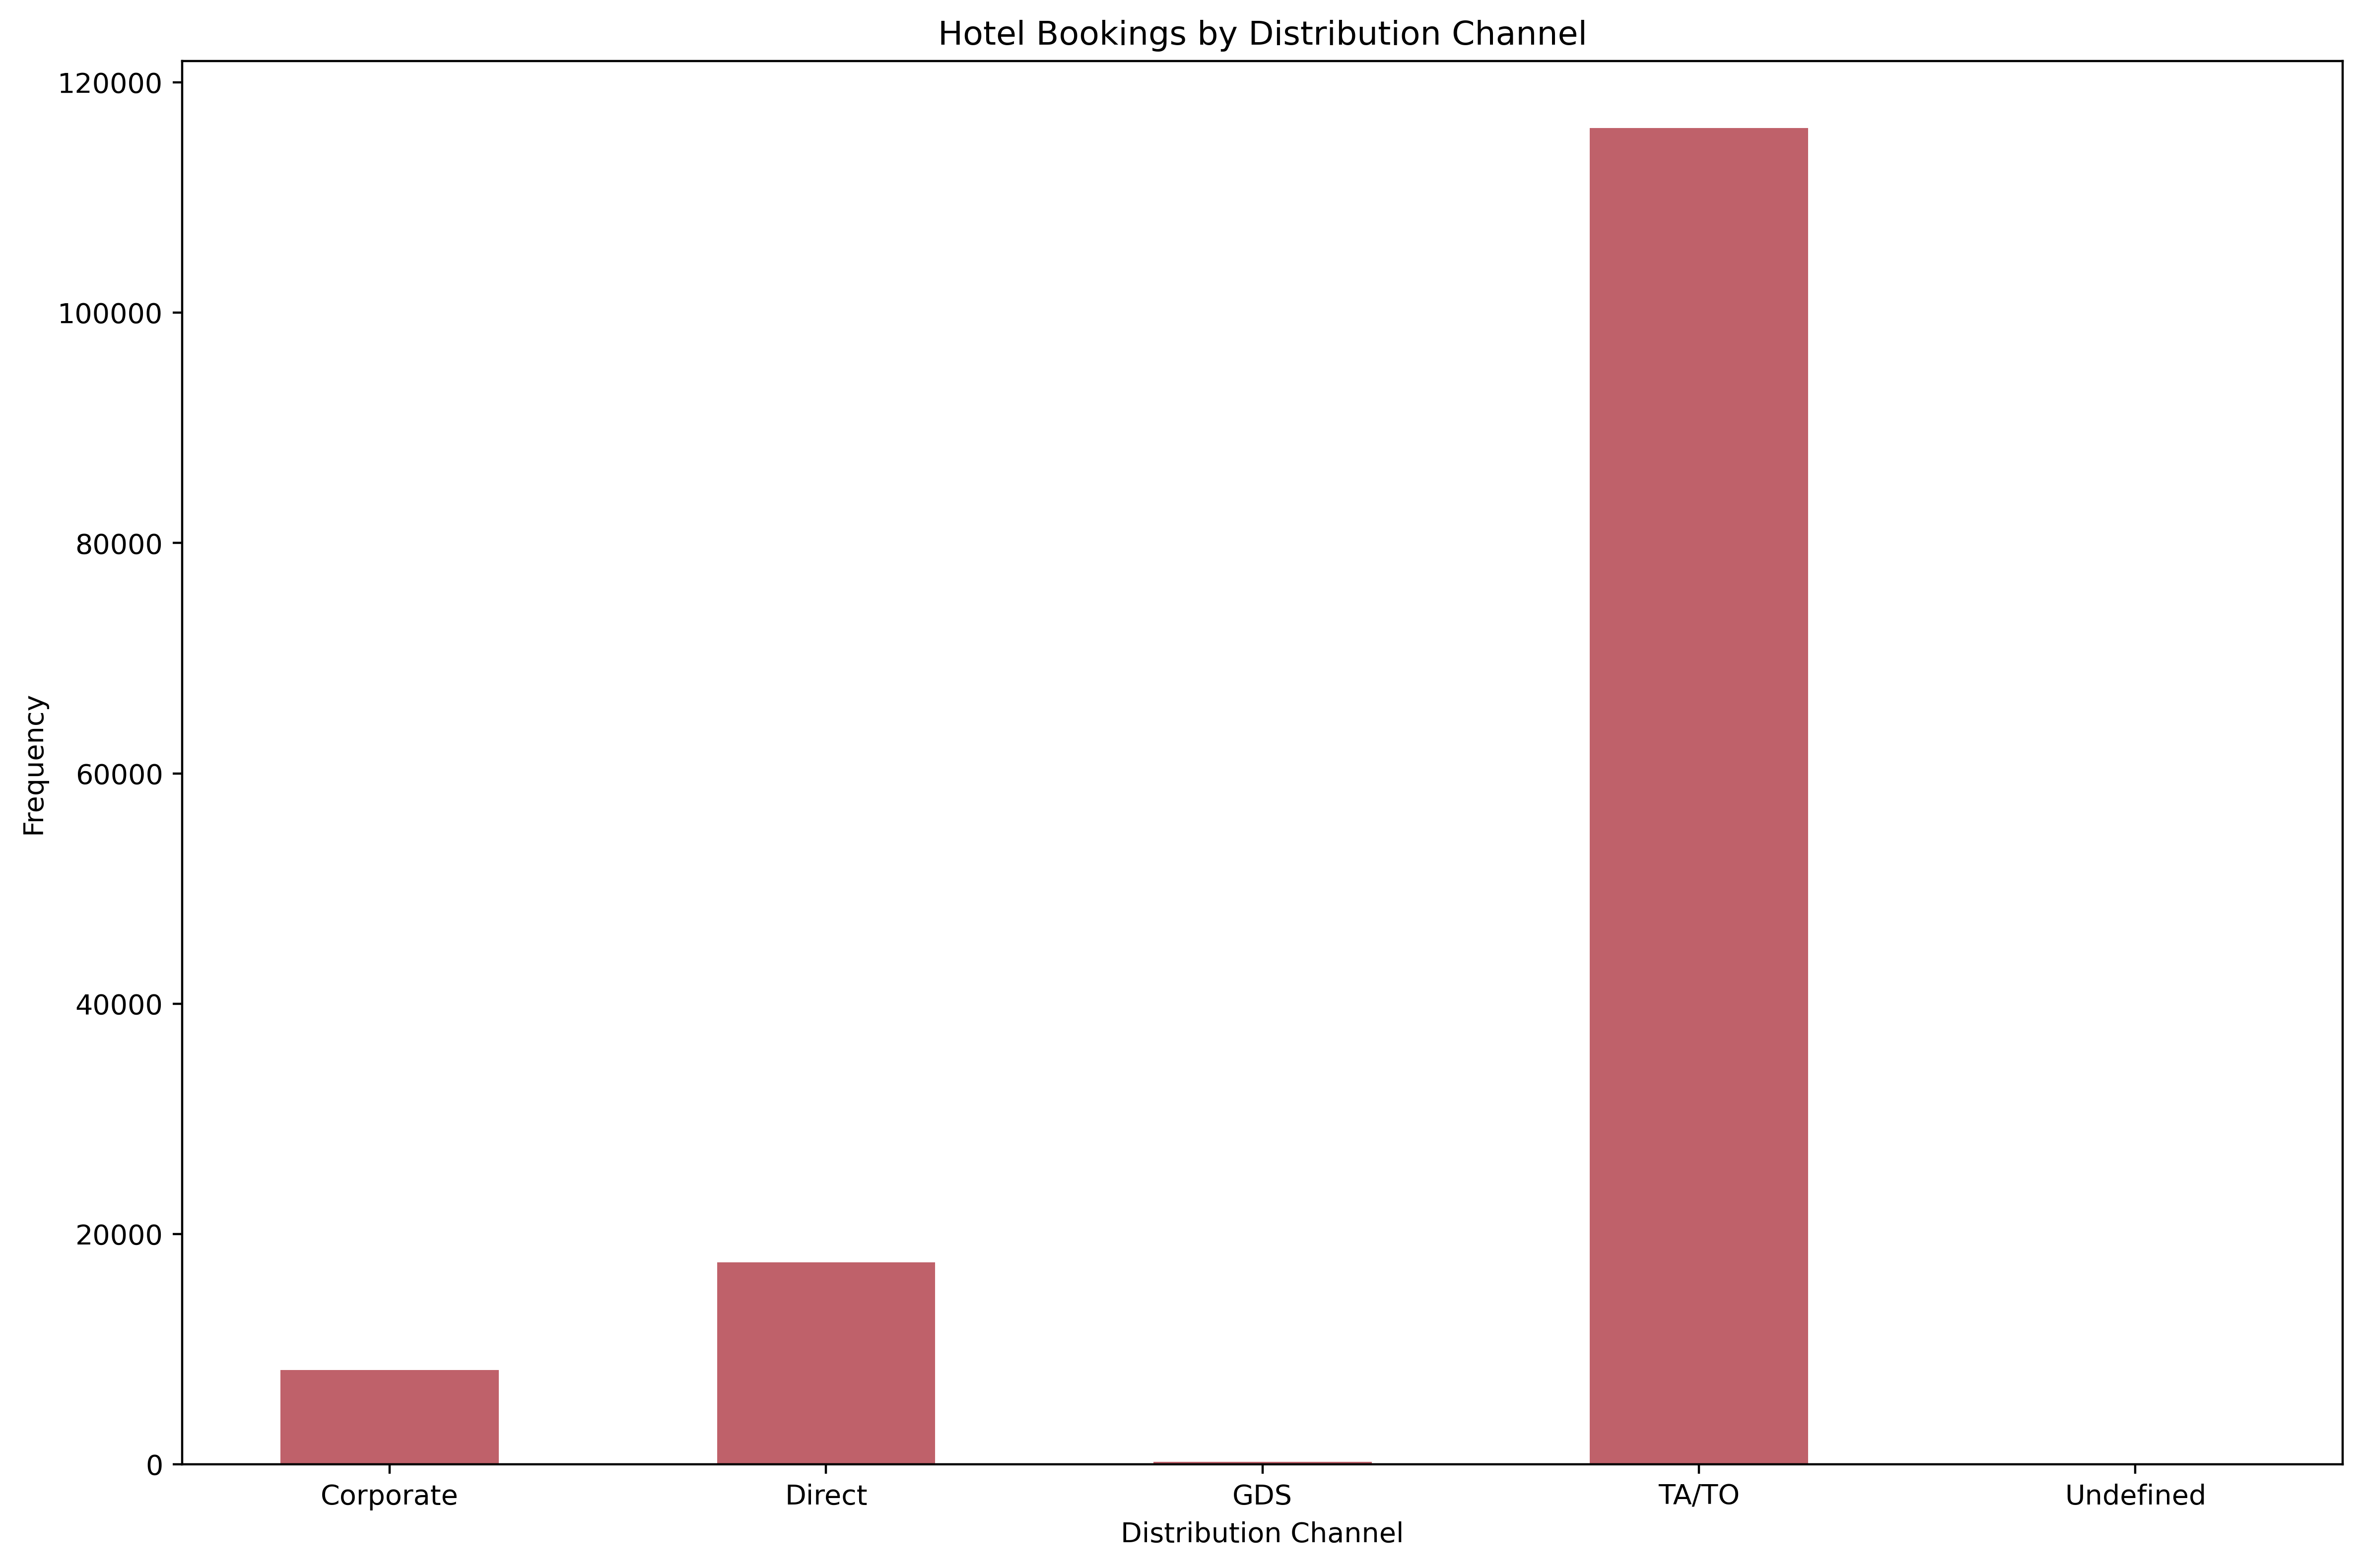

In [253]:
channel = hotel_df['distribution_channel'].value_counts().sort_index()
plt.figure(figsize=(12, 8), dpi=400)
plt.bar(x=channel.index, height=channel.values, width=0.5, color=fav_cols[0])
plt.xlabel(xlabel = 'Distribution Channel')
plt.ylabel(ylabel = 'Frequency')
plt.title(label = 'Hotel Bookings by Distribution Channel')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Bookings_By_Distribution_Channel'))
plt.show()

### is_repeated_guest

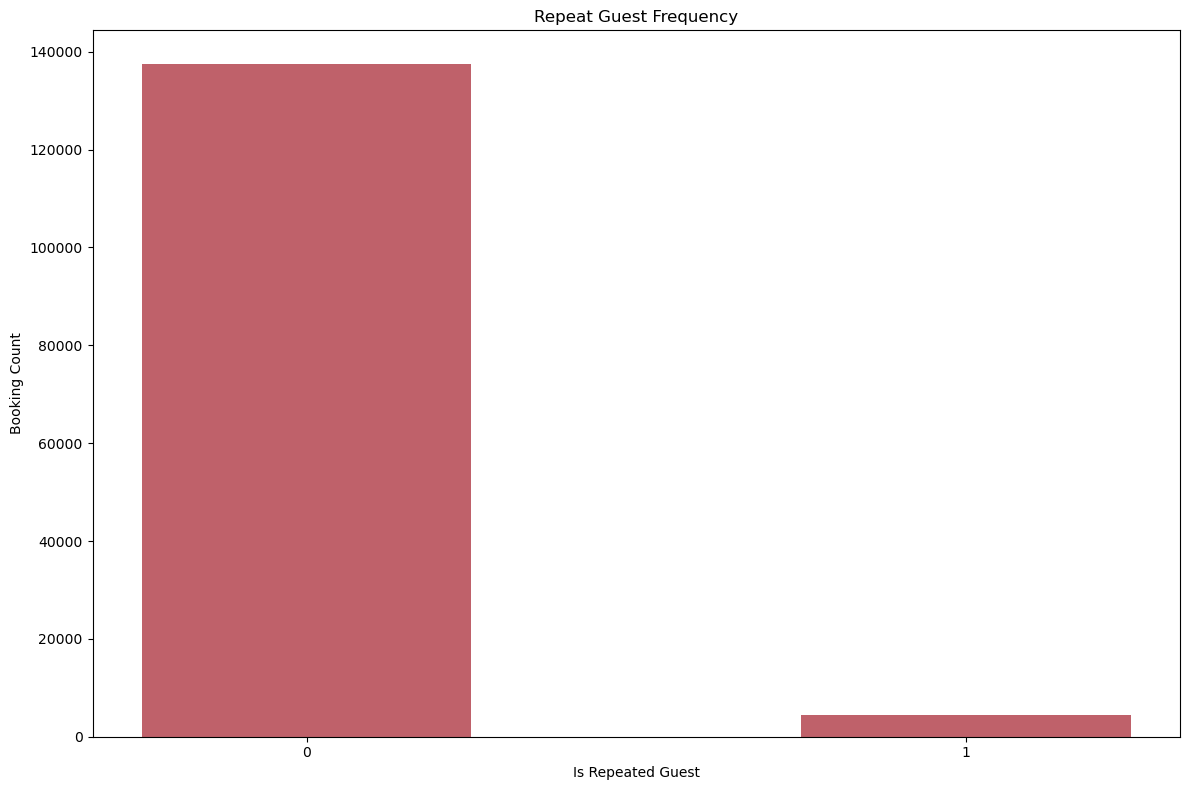

In [254]:
repeats = hotel_df['is_repeated_guest'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=repeats.index, height=repeats.values, width=0.5, color=fav_cols[0])
plt.xlabel(xlabel = 'Is Repeated Guest')
plt.ylabel(ylabel = 'Booking Count')
plt.title(label = 'Repeat Guest Frequency')
plt.xticks(ticks=repeats.index)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Repeat_Guest_Counts'))
plt.show()


### previous_cancellations

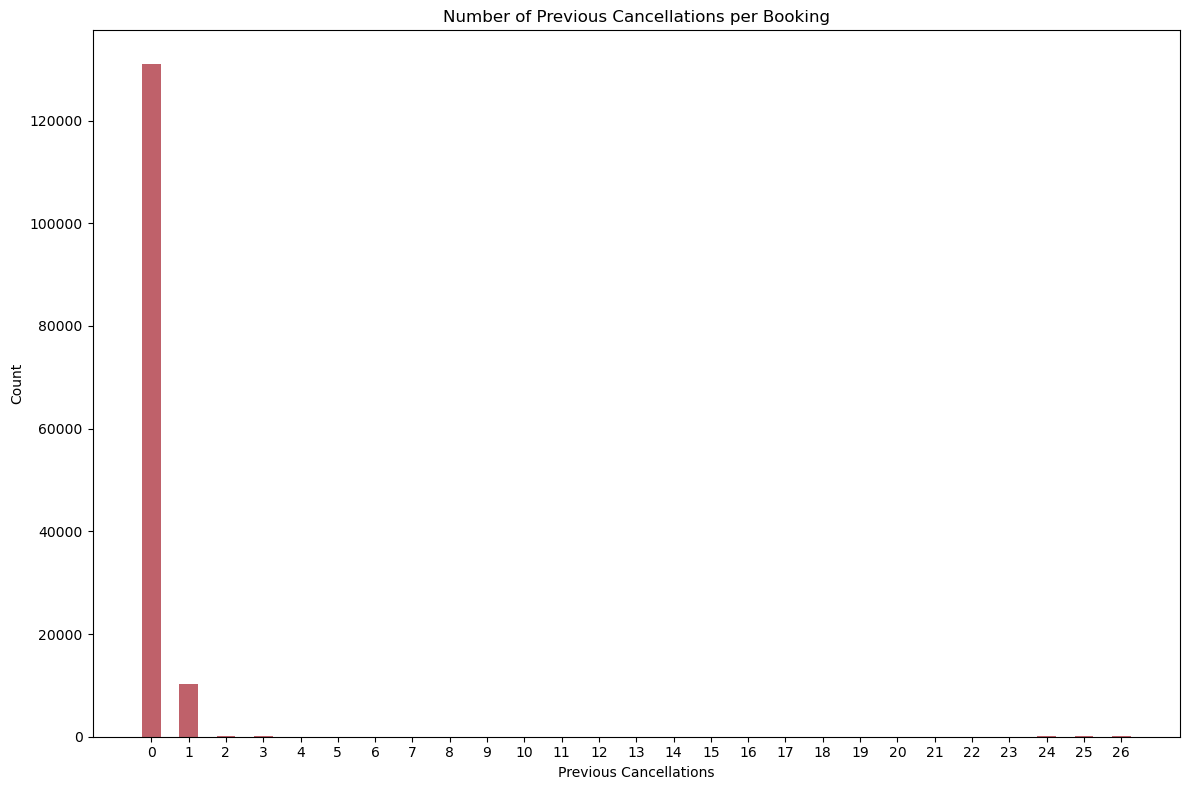

In [255]:
prev_cancellations = hotel_df['previous_cancellations'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=prev_cancellations.index, height=prev_cancellations.values, width=0.5, color=fav_cols[0])
plt.xlabel('Previous Cancellations')
plt.ylabel('Count')
plt.title('Number of Previous Cancellations per Booking')
plt.xticks(ticks=list(range(prev_cancellations.index.min(), prev_cancellations.index.max() + 1)))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Previous_Cancellations_Per_Booking'))
plt.show()

### previous_bookings_not_canceled

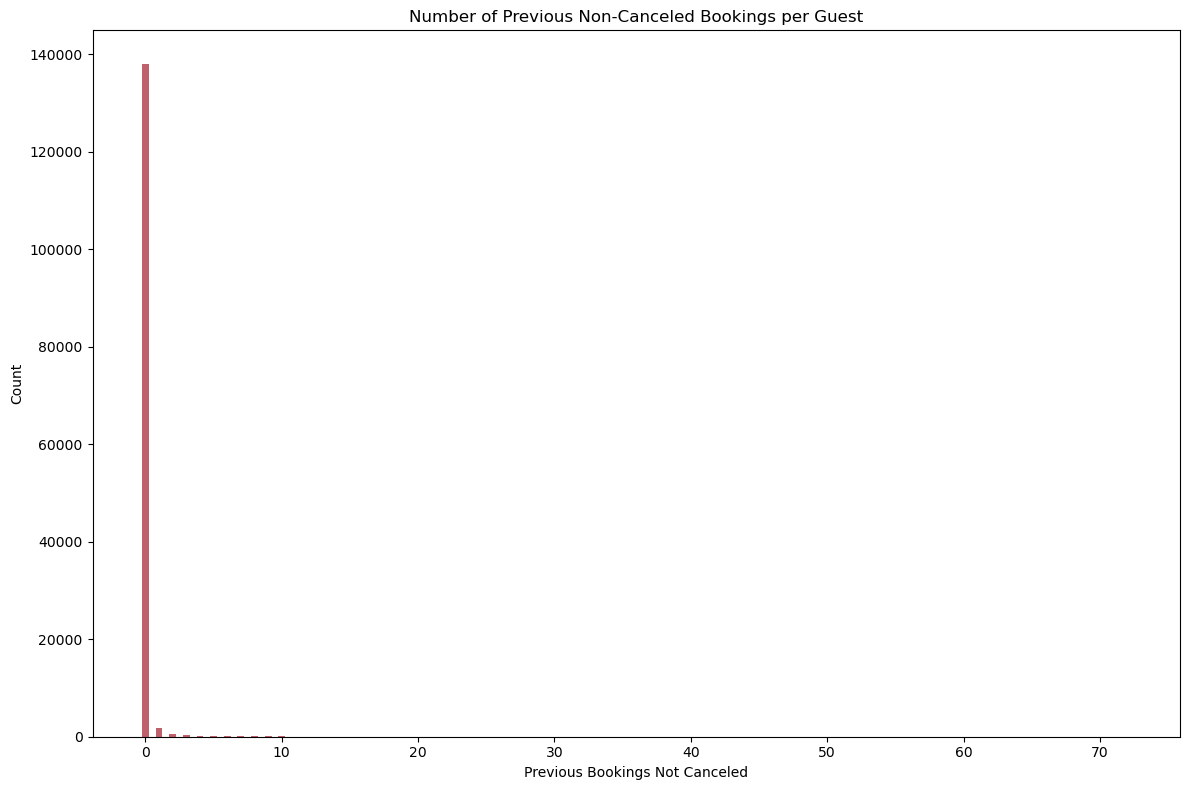

In [256]:
prev_not_canceled = hotel_df['previous_bookings_not_canceled'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=prev_not_canceled.index, height=prev_not_canceled.values, width=0.5, color=fav_cols[0])
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Count')
plt.title('Number of Previous Non-Canceled Bookings per Guest')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Previous_NonCanceled_Bookings'))
plt.show()


### reserved_room_type

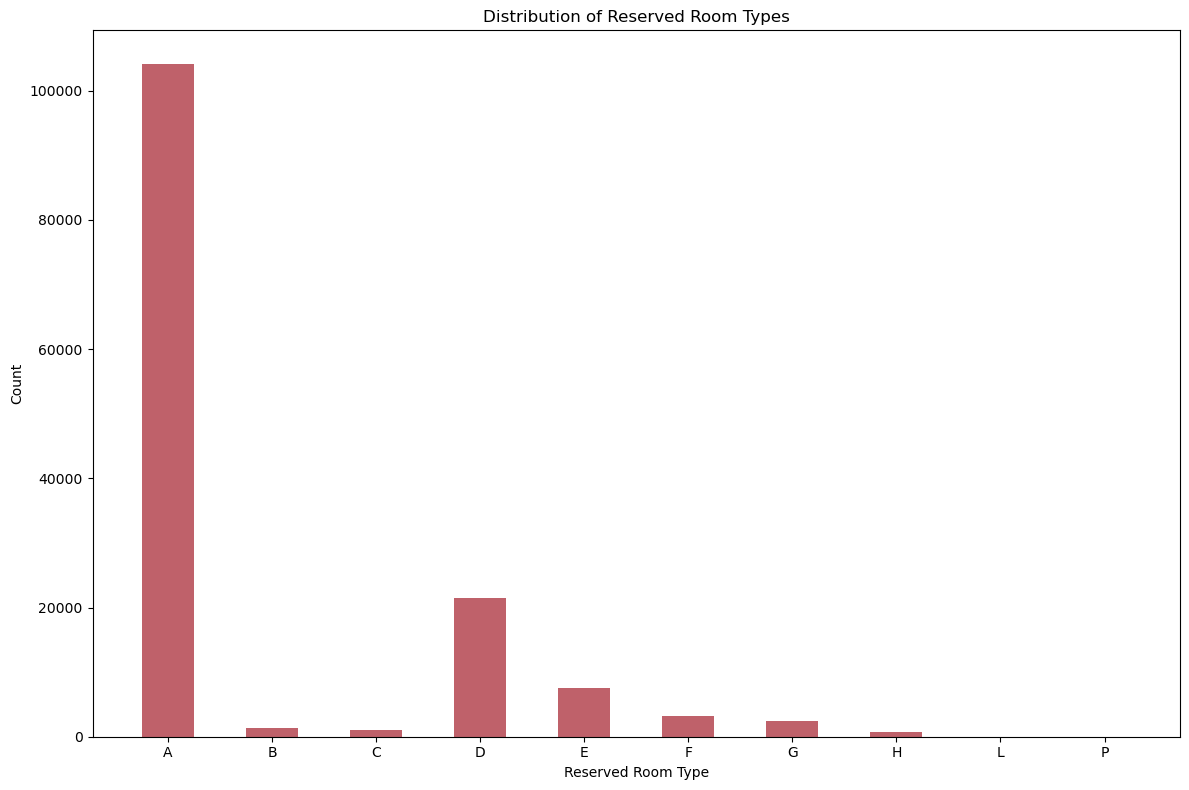

In [257]:
reserved = hotel_df['reserved_room_type'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=reserved.index, height=reserved.values, width=0.5, color=fav_cols[0])
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.title('Distribution of Reserved Room Types')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Reserved_Room_Type_Distribution'))
plt.show()


### assigned_room_type

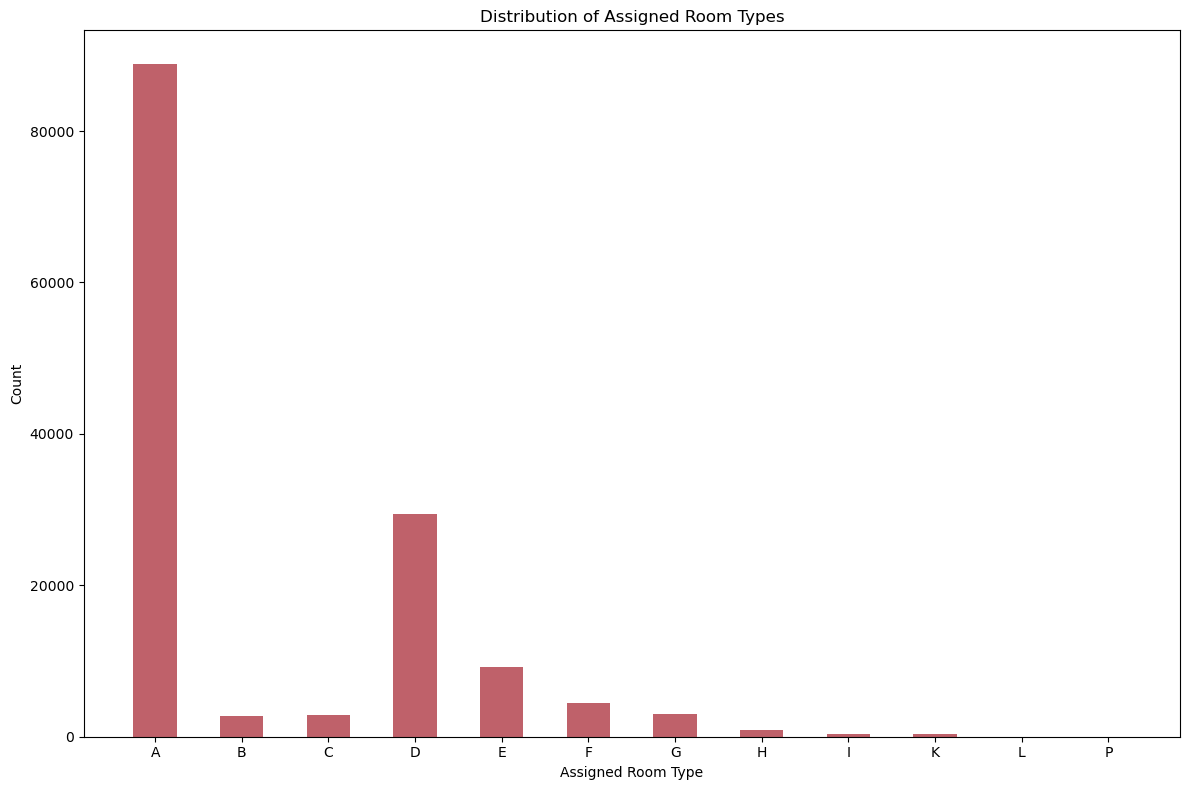

In [258]:
assigned = hotel_df['assigned_room_type'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=assigned.index, height=assigned.values, width=0.5, color=fav_cols[0])
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.title('Distribution of Assigned Room Types')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Assigned_Room_Type_Distribution'))
plt.show()


### booking_changes

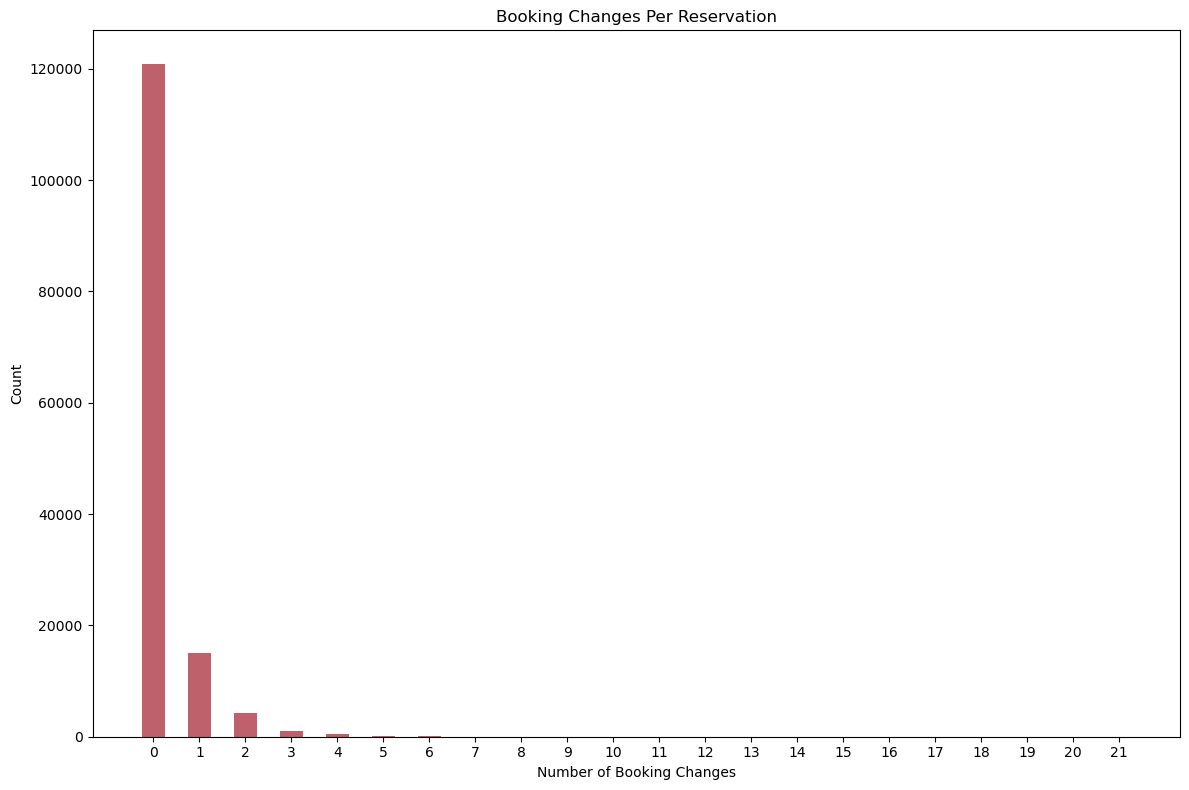

In [259]:
booking_changes = hotel_df['booking_changes'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=booking_changes.index, height=booking_changes.values, width=0.5, color=fav_cols[0])
plt.xlabel('Number of Booking Changes')
plt.ylabel('Count')
plt.title('Booking Changes Per Reservation')
plt.xticks(ticks=list(range(booking_changes.index.min(), booking_changes.index.max() + 1)))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Booking_Changes_Per_Reservation'))
plt.show()

### deposit_type

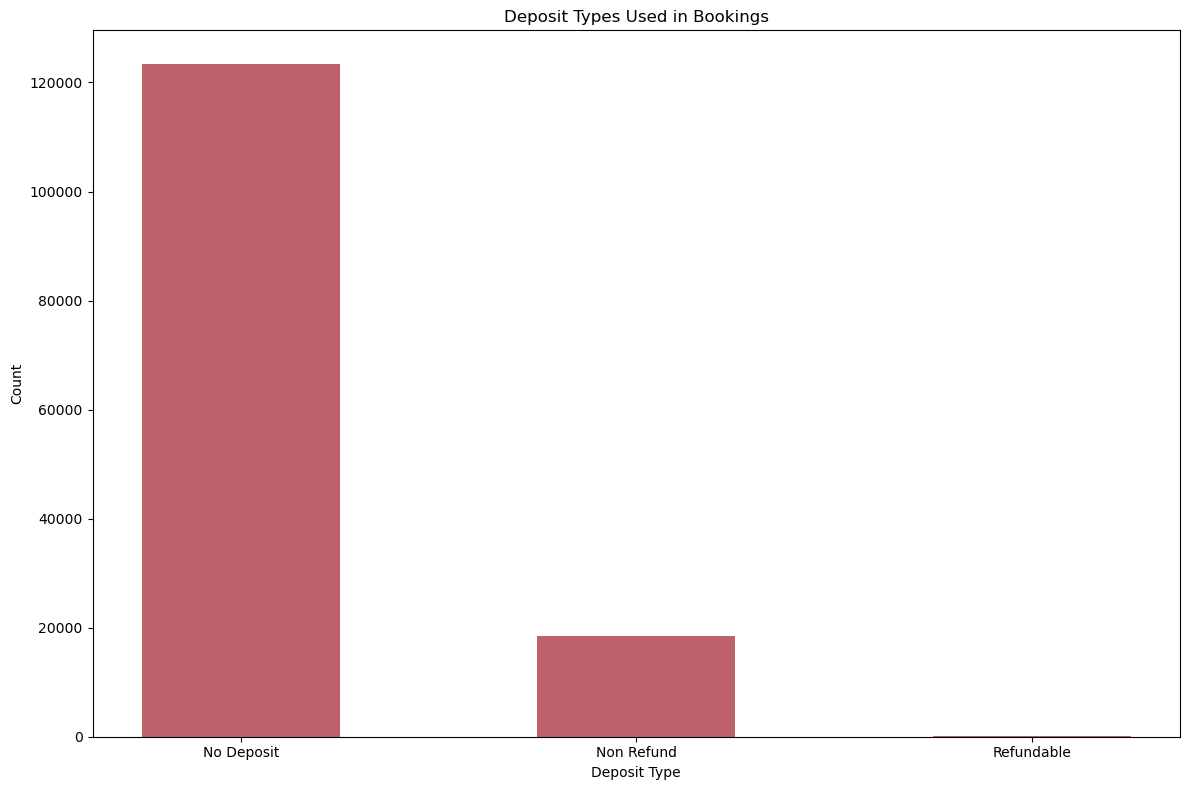

In [260]:
deposit = hotel_df['deposit_type'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=deposit.index, height=deposit.values, width=0.5, color=fav_cols[0])
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Deposit Types Used in Bookings')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Deposit_Types'))
plt.show()


### agent

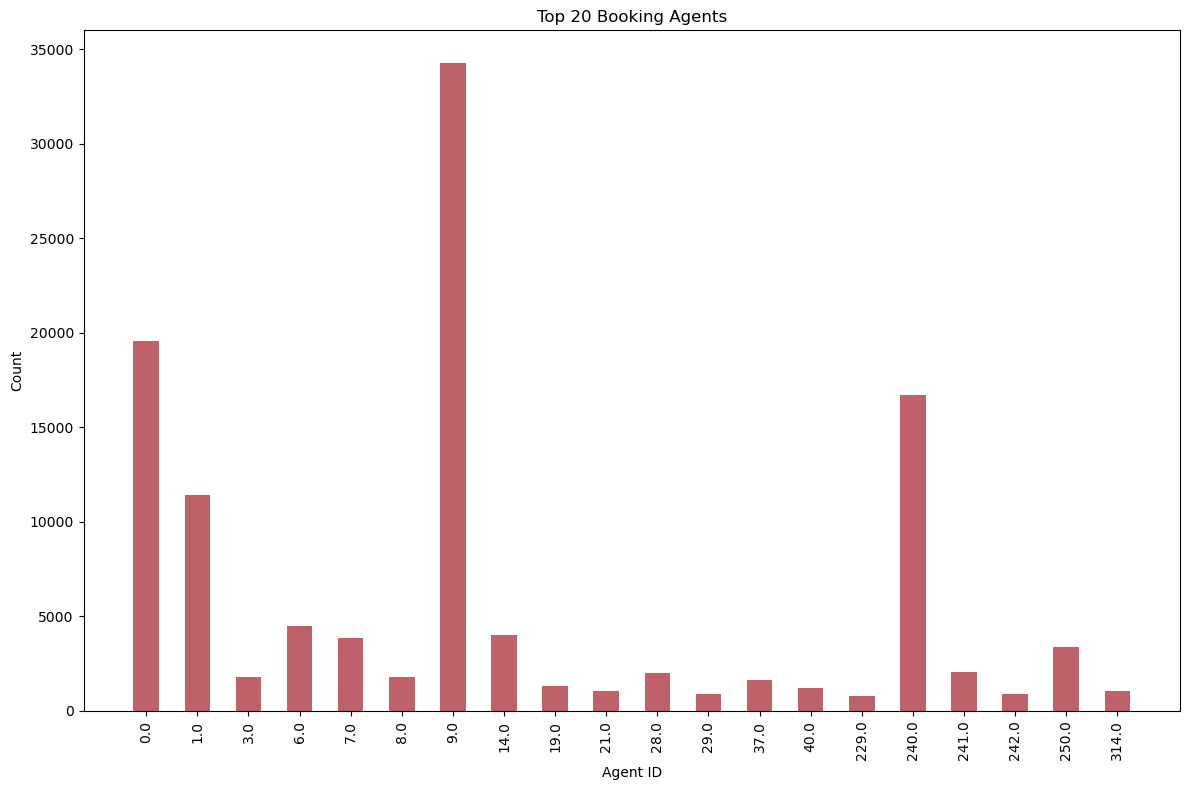

In [261]:
agent = hotel_df['agent'].value_counts().head(20).sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=agent.index.astype(str), height=agent.values, width=0.5, color=fav_cols[0])
plt.xlabel('Agent ID')
plt.ylabel('Count')
plt.title('Top 20 Booking Agents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Top_Booking_Agents'))
plt.show()

### company

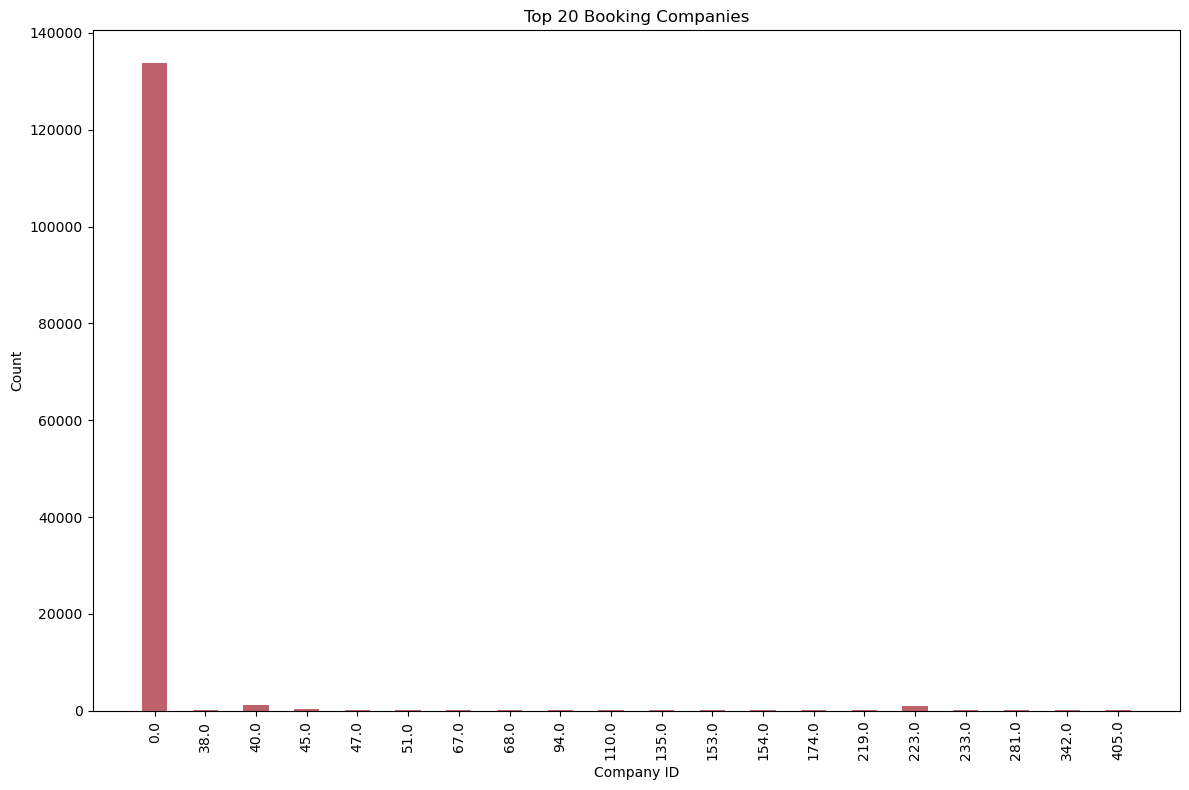

In [262]:
company = hotel_df['company'].value_counts().head(20).sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=company.index.astype(str), height=company.values, width=0.5, color=fav_cols[0])
plt.xlabel('Company ID')
plt.ylabel('Count')
plt.title('Top 20 Booking Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Top_Booking_Companies'))
plt.show()


### days_in_waiting_list


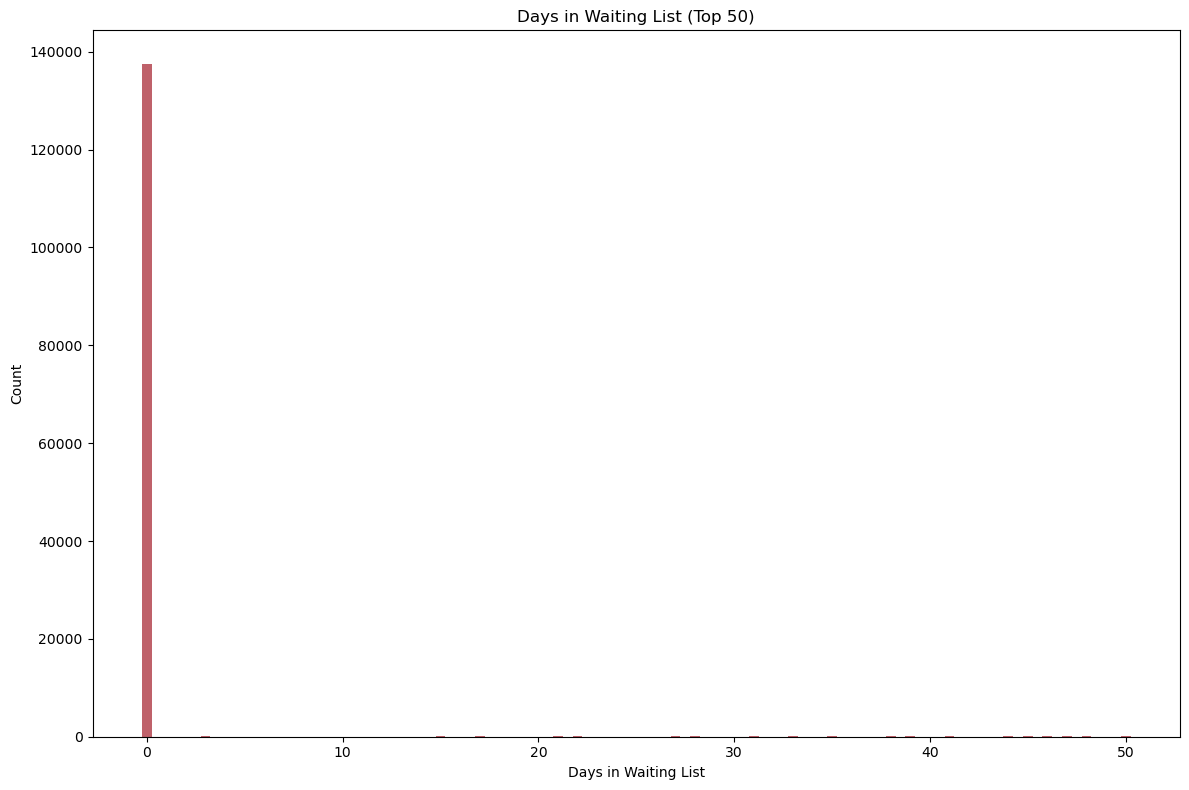

In [263]:
waiting_list = hotel_df['days_in_waiting_list'].value_counts().sort_index().head(50)

plt.figure(figsize=(12, 8))
plt.bar(x=waiting_list.index, height=waiting_list.values, width=0.5, color=fav_cols[0])
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.title('Days in Waiting List (Top 50)')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Days_In_Waiting_List'))
plt.show()


### customer_type


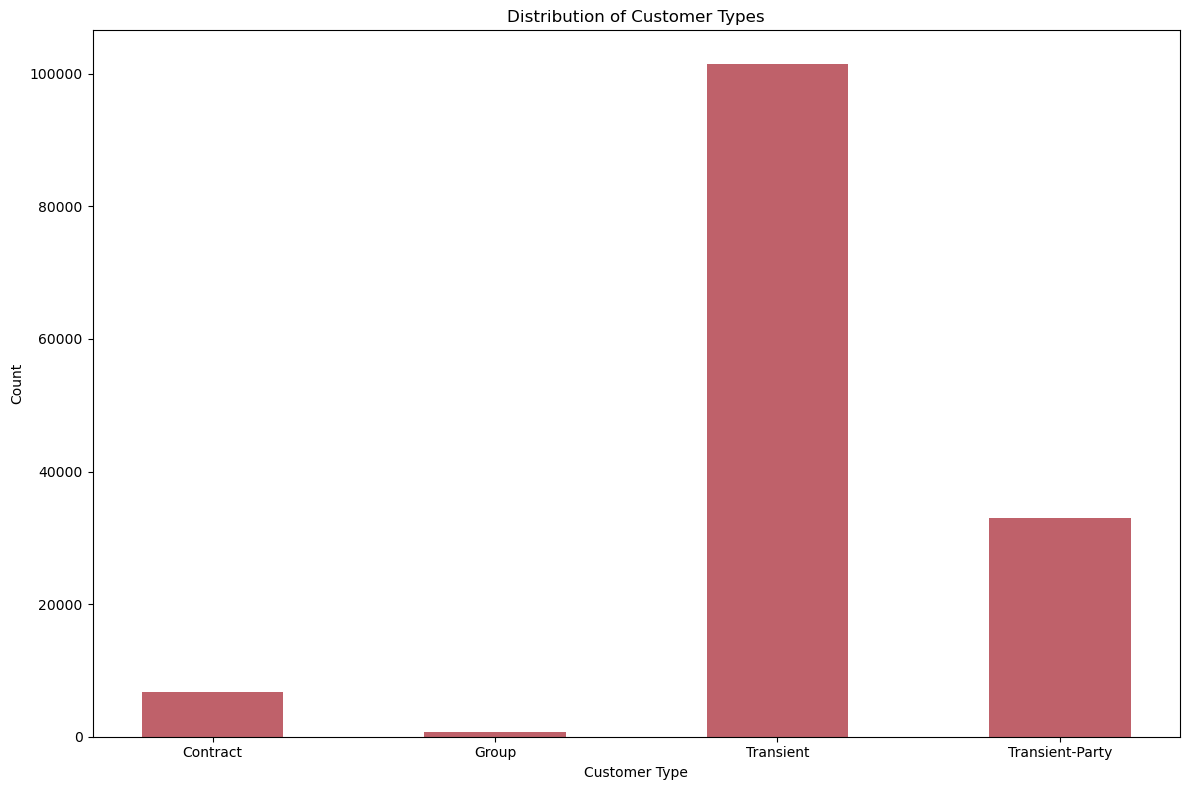

In [264]:
customer_type = hotel_df['customer_type'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=customer_type.index, height=customer_type.values, width=0.5, color=fav_cols[0])
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Customer_Type_Distribution'))
plt.show()


### adr


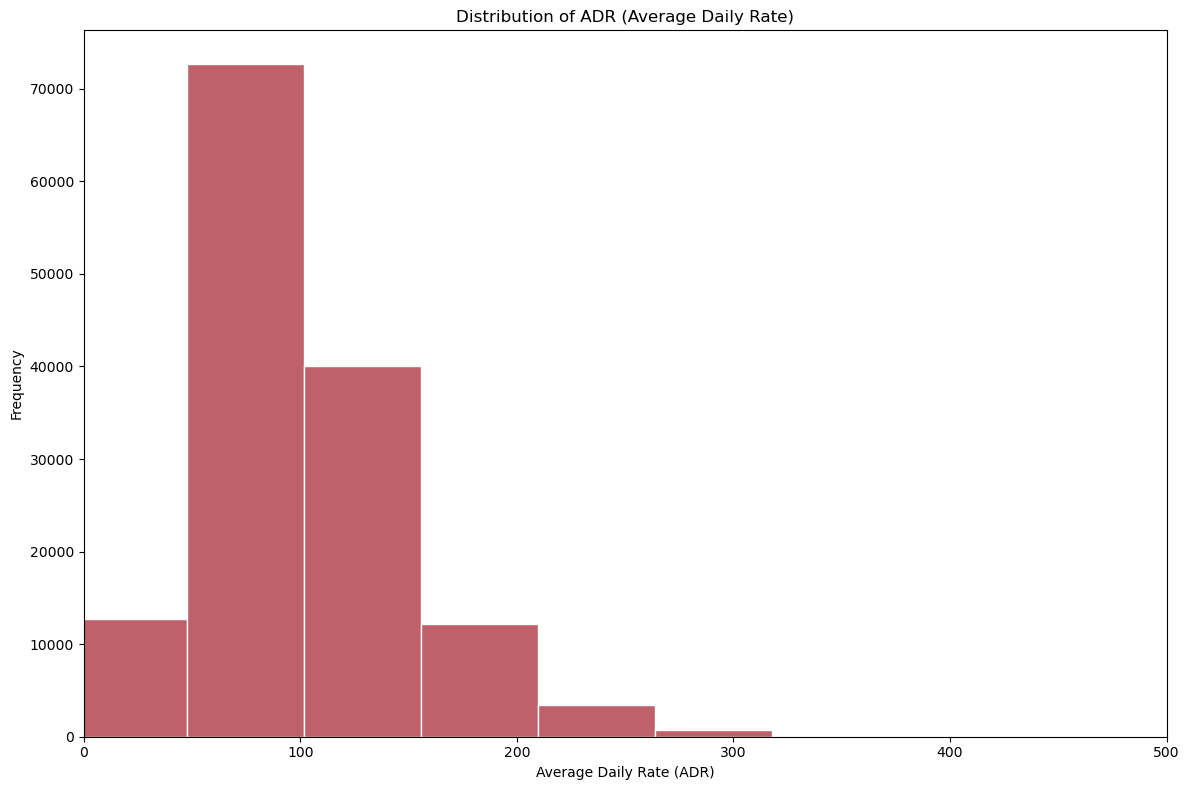

In [265]:
plt.figure(figsize=(12, 8))
plt.hist(hotel_df['adr'], bins=100, color=fav_cols[0], edgecolor = 'white')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlim(0, 500)  # Adjust if needed to remove extreme outliers
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'ADR_Distribution'))
plt.show()


### required_car_parking_spaces


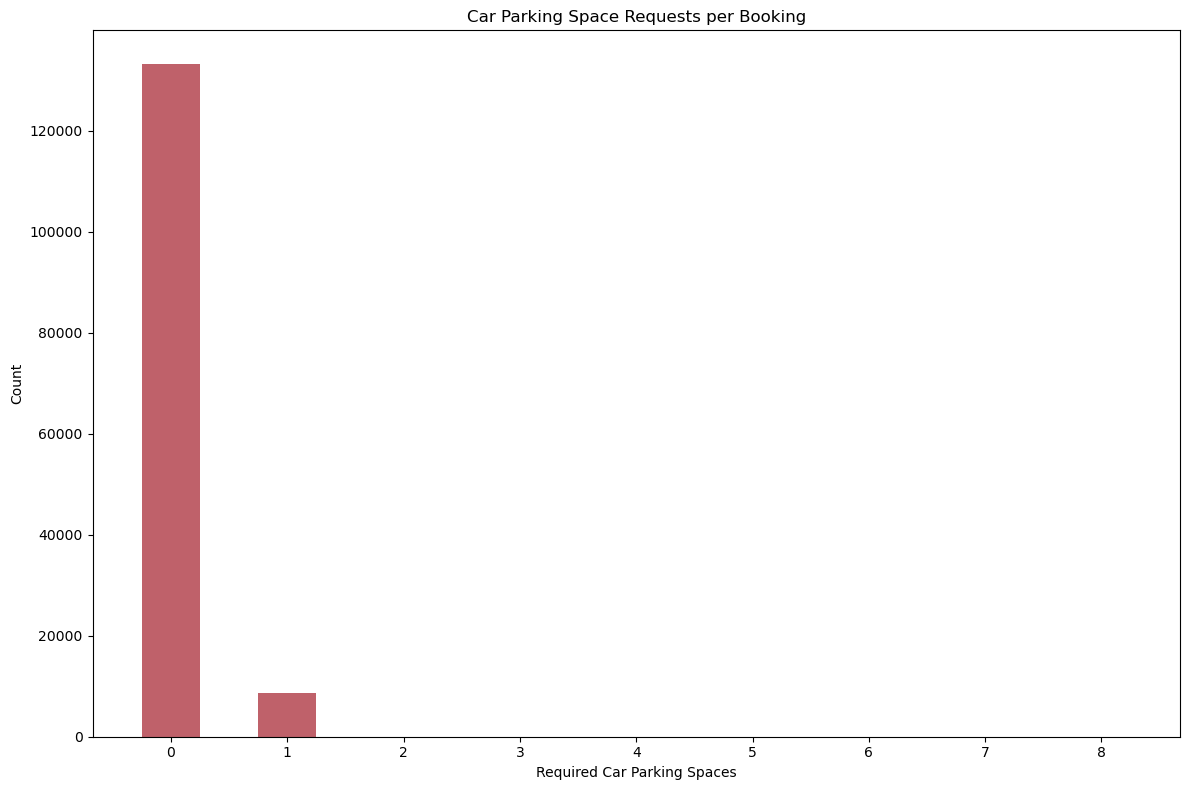

In [266]:
parking = hotel_df['required_car_parking_spaces'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=parking.index, height=parking.values, width=0.5, color=fav_cols[0])
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')
plt.title('Car Parking Space Requests per Booking')
plt.xticks(ticks=list(range(parking.index.min(), parking.index.max() + 1)))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Car_Parking_Space_Requests'))
plt.show()

### total_of_special_requests


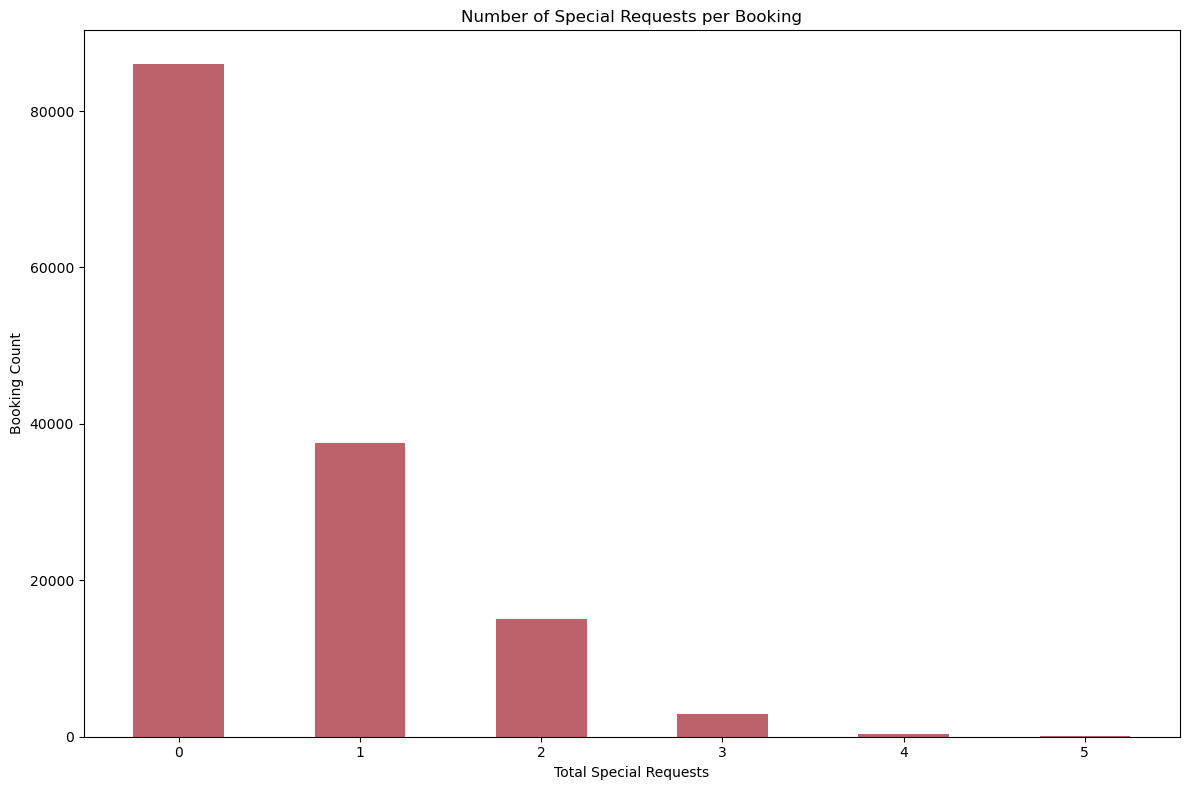

In [267]:
special_requests = hotel_df['total_of_special_requests'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=special_requests.index, height=special_requests.values, width=0.5, color=fav_cols[0])
plt.xlabel('Total Special Requests')
plt.ylabel('Booking Count')
plt.title('Number of Special Requests per Booking')
plt.xticks(ticks=list(range(special_requests.index.min(), special_requests.index.max() + 1)))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Special_Requests_Per_Booking'))
plt.show()

### reservation_status


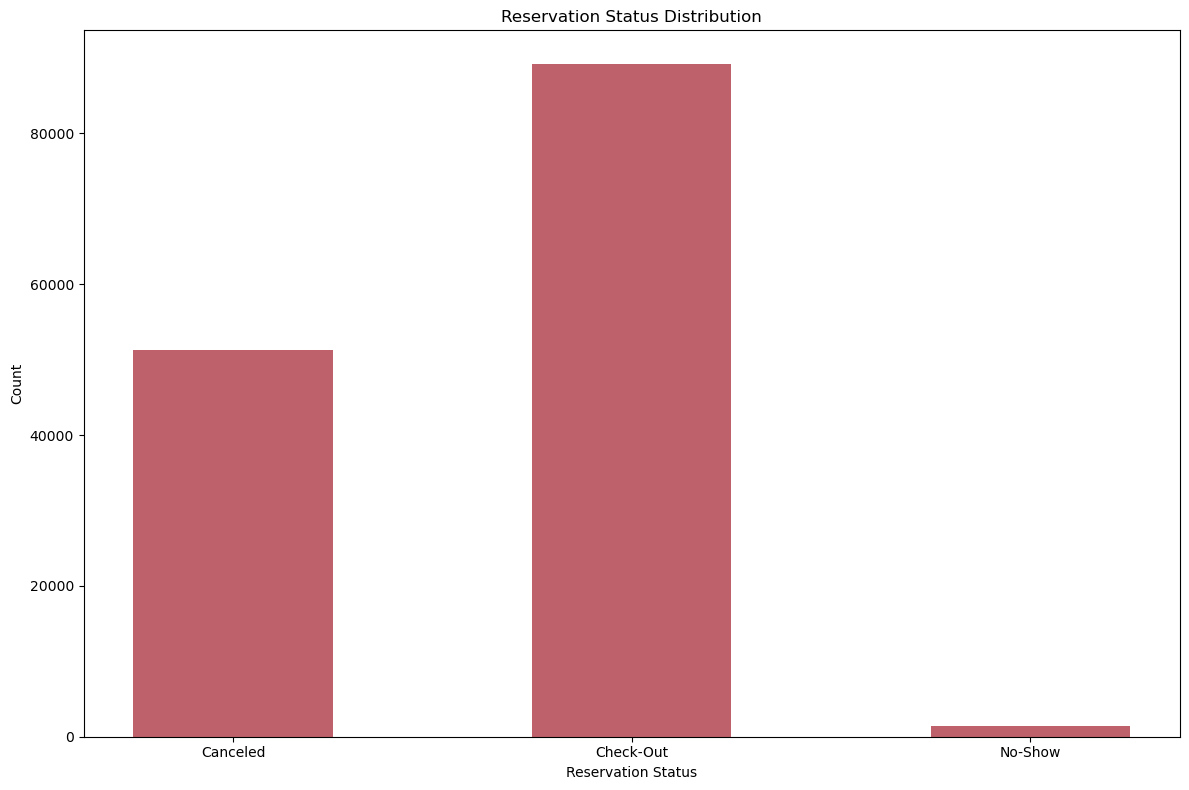

In [268]:
status = hotel_df['reservation_status'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(x=status.index, height=status.values, width=0.5, color=fav_cols[0])
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.title('Reservation Status Distribution')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Reservation_Status_Distribution'))
plt.show()

### reservation_status_date

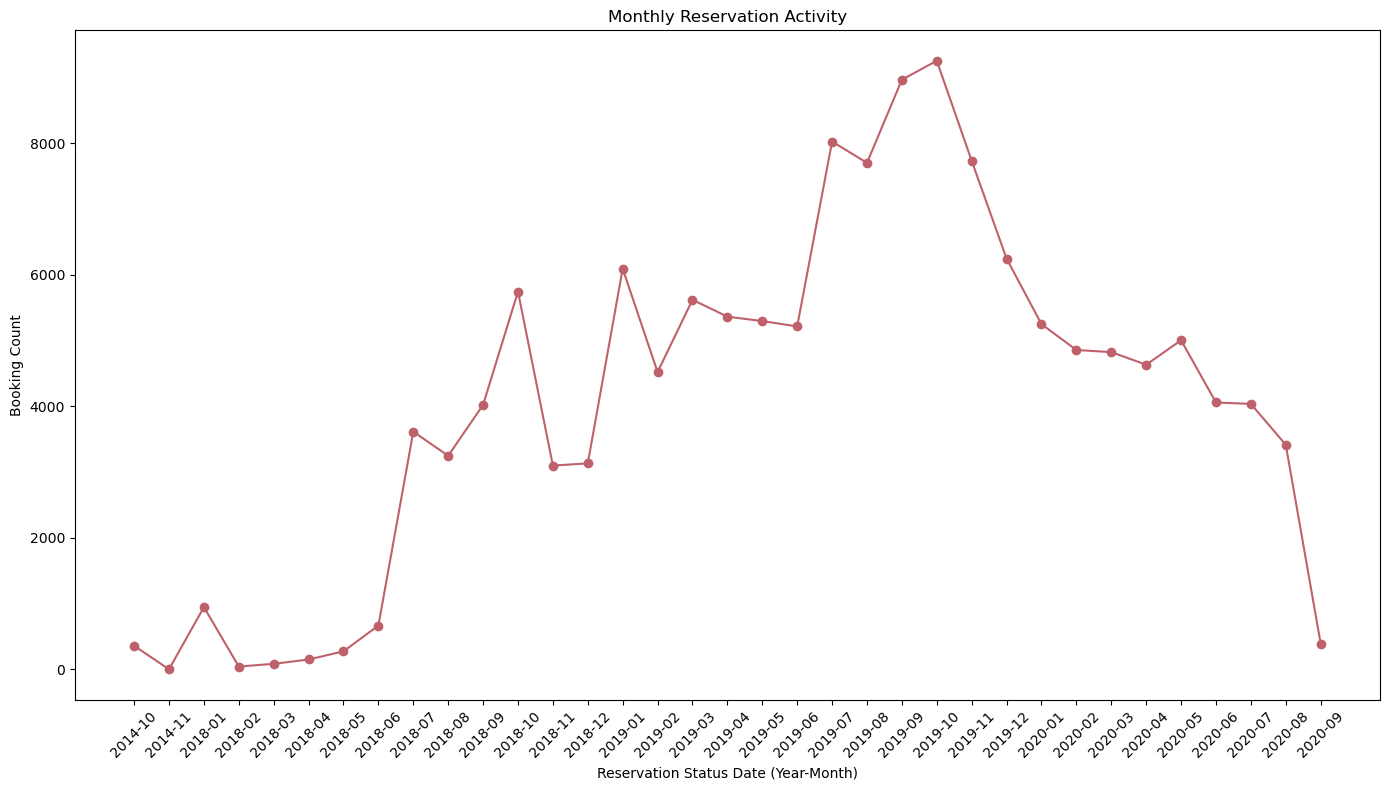

In [269]:

hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'])
hotel_df['status_year_month'] = hotel_df['reservation_status_date'].dt.to_period('M').astype(str)
status_by_month = hotel_df['status_year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.plot(status_by_month.index, status_by_month.values, color=fav_cols[0], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Reservation Status Date (Year-Month)')
plt.ylabel('Booking Count')
plt.title('Monthly Reservation Activity')
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'Reservation_Status_Date_Trend'))
plt.show()

# Revenue and Risks Insights

Which combinations of features are associated with high ADR?

(0.0, 1000.0)

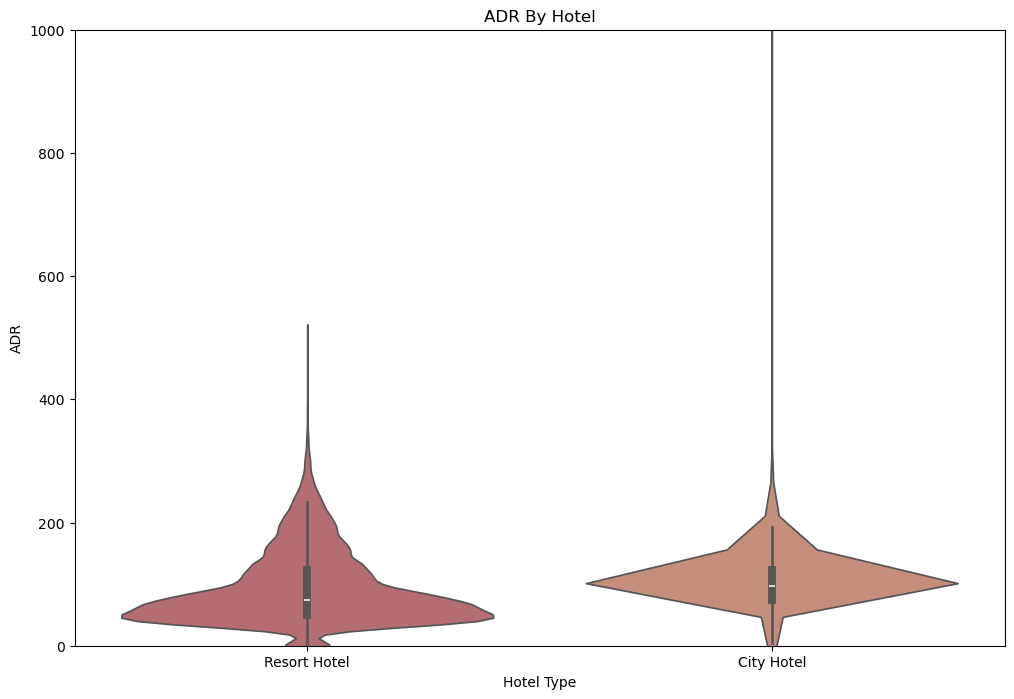

In [270]:
hotel_df['adr']
plt.figure(figsize=(12,8))
sns.violinplot(data = hotel_df,x = 'hotel', hue = 'hotel', y = 'adr', palette=fav_cols[:2], legend=False)
plt.xlabel(xlabel = 'Hotel Type')
plt.ylabel(ylabel = 'ADR')
plt.title(label = 'ADR By Hotel')
plt.ylim(0, 1000)

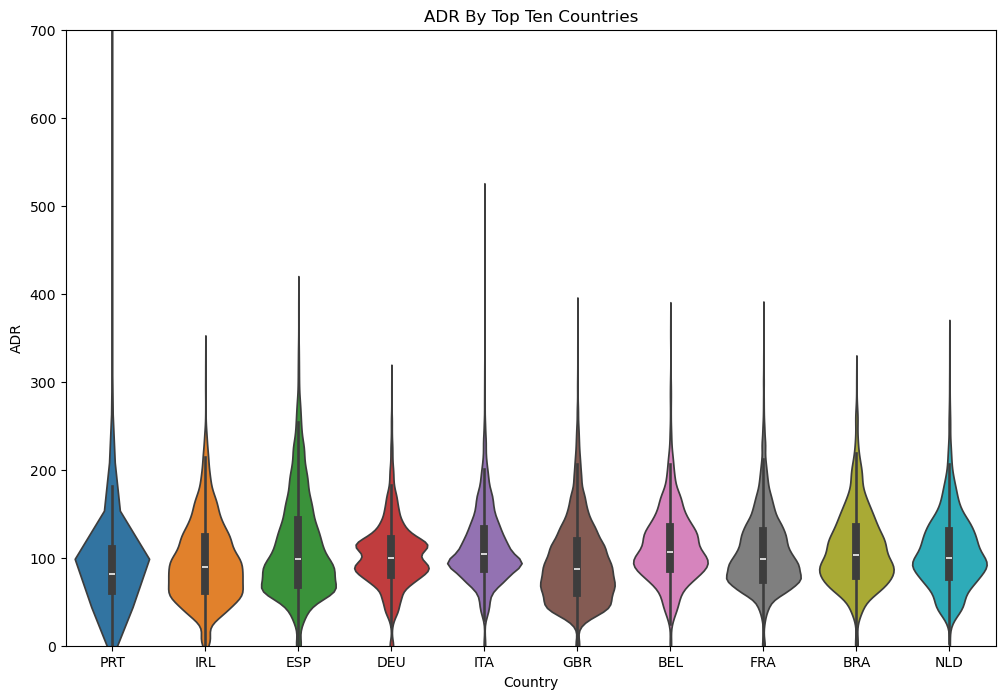

In [271]:
plt.figure(figsize = (12,8))
sns.violinplot(data = hotel_df[hotel_df['country'].isin(countries[:10].index.to_list())], x = 'country', y = 'adr', hue = 'country')
plt.ylim((0,700))
plt.xlabel('Country')
plt.ylabel('ADR')
plt.title('ADR By Top Ten Countries')
plt.show();

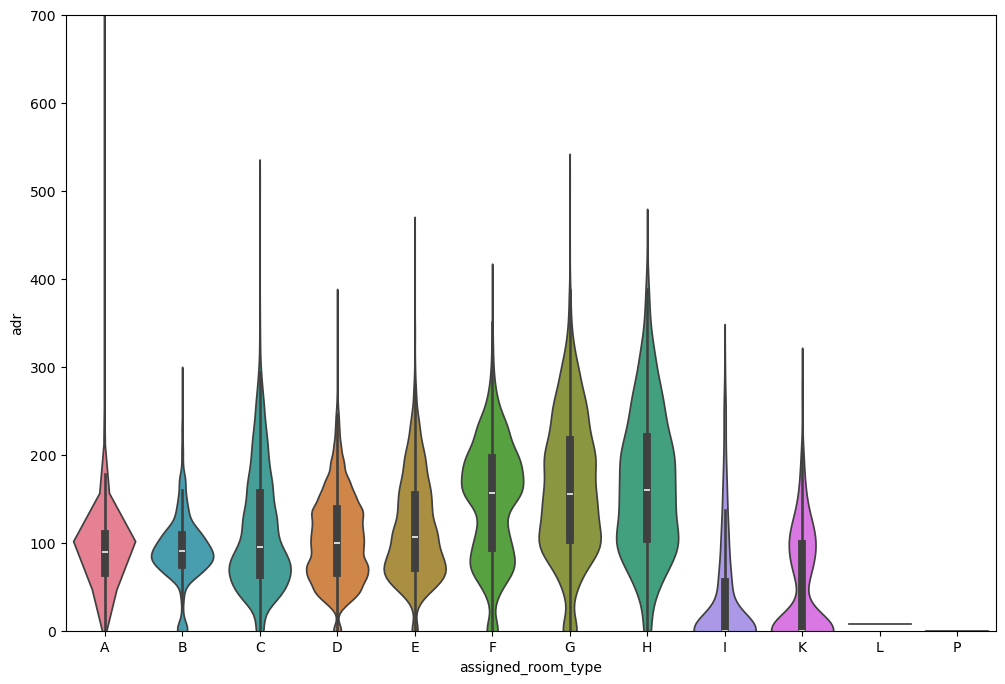

In [273]:

plt.figure(figsize=(12,8))
sns.violinplot(data = hotel_df, x = 'assigned_room_type', y = 'adr', hue = 'assigned_room_type', legend = False, order=sorted(hotel_df['assigned_room_type'].unique()),)
plt.ylim(0, 700)
plt.show();

# Predictive Modeling

Can we accurately predict ADR for a hotel?

# Customer Segementation

Can we identify distinct clusters of customer types based on booking behavior?

# Booking Behavior Patterns

How early do people cancel their reservations?